# Importing necessary libraries

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
import datetime

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import pylab

# For scaling the data using z-score
from sklearn.preprocessing import StandardScaler

# For train and test splitting
from sklearn.model_selection import train_test_split

# Linear regression model using sklearn
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# Linear regression model using statsmodels
import statsmodels.api as sm

# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

# Support Vector Machine Regressor
from sklearn.svm import SVR

# K-Nearest Neighbours Regressor
from sklearn.neighbors import KNeighborsRegressor

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# For checking model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# For checking model assumptions
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

# For ignoring warnings
import warnings

In [2]:
# Ignore all warnings
warnings.filterwarnings("ignore")

### Loading the dataset

In [3]:
# Loading the dataset
data = pd.read_csv("House+Price+Prediction+-+Dataset.csv")

# Data Overview

In [4]:
data.head()

cid         dayhours   price  room_bed  room_bath  living_measure  \
0  3876100940  20150427T000000  600000       4.0       1.75          3050.0   
1  3145600250  20150317T000000  190000       2.0       1.00           670.0   
2  7129303070  20140820T000000  735000       4.0       2.75          3040.0   
3  7338220280  20141010T000000  257000       3.0       2.50          1740.0   
4  7950300670  20150218T000000  450000       2.0       1.00          1120.0   

   lot_measure ceil coast  sight  ... basement  yr_built  yr_renovated  \
0       9440.0    1     0    0.0  ...   1250.0      1966             0   
1       3101.0    1     0    0.0  ...      0.0      1948             0   
2       2415.0    2     1    4.0  ...      0.0      1966             0   
3       3721.0    2     0    0.0  ...      0.0      2009             0   
4       4590.0    1     0    0.0  ...      0.0      1924             0   

   zipcode      lat      long  living_measure15  lot_measure15 furnished  \
0    98034  47.7228  -122.183            2020.0         8660.0       0.0   
1    98118  47.5546  -122.274            1660.0         4100.0       0.0   
2    98118  47.5188  -122.256            2620.0         2433.0       0.0   
3    98002  47.3363  -122.213            2030.0         3794.0       0.0   
4    98118  47.5663  -122.285            1120.0         5100.0       0.0   

   total_area  
0       12490  
1        3771  
2        5455  
3        5461  
4        5710  

[5 rows x 23 columns]

In [5]:
# Checking the shape for number of rows and columns
print("Shape of the dataframe:", data.shape)

Shape of the dataframe: (21613, 23)


In [6]:
# Checking info of data for datatypes and count of non null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21505 non-null  float64
 4   room_bath         21505 non-null  float64
 5   living_measure    21596 non-null  float64
 6   lot_measure       21571 non-null  float64
 7   ceil              21571 non-null  object 
 8   coast             21612 non-null  object 
 9   sight             21556 non-null  float64
 10  condition         21556 non-null  object 
 11  quality           21612 non-null  float64
 12  ceil_measure      21612 non-null  float64
 13  basement          21612 non-null  float64
 14  yr_built          21612 non-null  object 
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

### Data Cleaning

In [7]:
# creating a copy of the data to avoid any changes to original data
df = data.copy()

In [8]:
# Converting the dayhours to date time format
df['dayhours'] = pd.to_datetime(df['dayhours'], format='%Y%m%dT%H%M%S')

# Converting numerical datatypes listed as objects due to presence of unwanted characters ('$' in this case)
obj_to_num = lambda x:pd.to_numeric(x, errors='coerce')

object_columns = df.select_dtypes(include = object).columns.to_list()


# Group by brand_name and apply median_filler to numeric columns
df[object_columns] = df[object_columns].apply(obj_to_num)

In [9]:
df.describe().T

count                           mean                  min  \
cid               21613.0              4580301520.864988            1000102.0   
dayhours            21613  2014-10-29 04:38:01.959931392  2014-05-02 00:00:00   
price             21613.0                  540182.158793              75000.0   
room_bed          21505.0                       3.371355                  0.0   
room_bath         21505.0                       2.115171                  0.0   
living_measure    21596.0                    2079.860761                290.0   
lot_measure       21571.0                   15104.583283                520.0   
ceil              21541.0                       1.494127                  1.0   
coast             21582.0                        0.00746                  0.0   
sight             21556.0                       0.234366                  0.0   
condition         21528.0                       3.409327                  1.0   
quality           21612.0                       7.656857                  1.0   
ceil_measure      21612.0                    1788.366556                290.0   
basement          21612.0                     291.522534                  0.0   
yr_built          21598.0                    1971.009353               1900.0   
yr_renovated      21613.0                      84.402258                  0.0   
zipcode           21613.0                   98077.939805              98001.0   
lat               21613.0                      47.560053              47.1559   
long              21579.0                    -122.213844             -122.519   
living_measure15  21447.0                    1987.065557                399.0   
lot_measure15     21584.0                    12766.54318                651.0   
furnished         21584.0                        0.19672                  0.0   
total_area        21545.0                   17192.041634               1423.0   

                                  25%                  50%  \
cid                      2123049194.0         3904930410.0   
dayhours          2014-07-22 00:00:00  2014-10-16 00:00:00   
price                        321950.0             450000.0   
room_bed                          3.0                  3.0   
room_bath                        1.75                 2.25   
living_measure                1429.25               1910.0   
lot_measure                    5040.0               7618.0   
ceil                              1.0                  1.5   
coast                             0.0                  0.0   
sight                             0.0                  0.0   
condition                         3.0                  3.0   
quality                           7.0                  7.0   
ceil_measure                   1190.0               1560.0   
basement                          0.0                  0.0   
yr_built                       1951.0               1975.0   
yr_renovated                      0.0                  0.0   
zipcode                       98033.0              98065.0   
lat                            47.471              47.5718   
long                         -122.328              -122.23   
living_measure15               1490.0               1840.0   
lot_measure15                  5100.0               7620.0   
furnished                         0.0                  0.0   
total_area                     7032.0               9575.0   

                                  75%                  max                std  
cid                      7308900445.0         9900000190.0  2876565571.312048  
dayhours          2015-02-17 00:00:00  2015-05-27 00:00:00                NaN  
price                        645000.0            7700000.0      367362.231718  
room_bed                          4.0                 33.0           0.930289  
room_bath                         2.5                  8.0           0.770248  
living_measure                 2550.0              13540.0         918.496121  
lot_measure               

## Exploratory Data Analysis (EDA)

In [10]:
# function to plot combined boxplot and histogram along with mean and median values

def plot_histogram_and_boxplot(data, feature, bins=30, kde=True, figsize=(14, 10)):
    """
    Plot a histogram and a box plot of the given feature in a DataFrame.

    Parameters:
    - data (DataFrame): The DataFrame containing the data to be plotted.
    - feature (str): The name of the feature (column) to be plotted.
    - bins (int, optional): Number of bins for the histogram. Default is 30.
    - kde (bool, optional): Whether to display the Kernel Density Estimation (KDE) on the histogram. Default is True.
    - figsize (tuple, optional): Figure size in inches. Default is (14, 10).

    Example usage:
    plot_histogram_and_boxplot(data, 'feature_name', bins=30, kde=True)
    """
    # Create a figure with two rows and one column
    fig, axes = plt.subplots(2, 1, figsize=figsize, gridspec_kw={'height_ratios': [0.2, 0.8]})

    # Plot box plot on top
    sns.boxplot(data=data, x=feature, ax=axes[0], showmeans=np.array(True))
    axes[0].set_title(f'Distribution of {feature}', fontsize = 25)
    axes[0].set_xlabel(feature, fontsize = 18)

    # Plot histogram on bottom
    sns.histplot(data=data, x=feature, bins=bins, kde=kde, ax=axes[1])
    axes[1].axvline(data[feature].mean(), color='green', linestyle='--', label='Mean')
    axes[1].axvline(data[feature].median(), color='black', linestyle='-.', label='Median')
    axes[1].set_ylabel('Count', fontsize = 18)
    axes[1].set_xlabel(feature, fontsize = 18)
    axes[1].legend()

    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()


In [11]:
# function to plot labeled barplot with count or percentage values on the bars

def countplot_labeled(data, feature, title, n=None, perc=False, figsize=(14, 10), xtick_rotation = 0):
    """
    Create a labeled countplot showing the top N values of a feature column in a DataFrame.

    Parameters:
    - data (DataFrame): The DataFrame containing the data.
    - feature (str): The name of the feature column to be plotted.
    - title (str): Title of the plot
    - n (int or None, optional): The number of top values to display. Default is None (display all values).
    - perc (bool, optional): If True, annotate with percentages; if False, annotate with counts. Default is False.
    - figsize (tuple, optional): Figure size in inches. Default is (14, 10).
    - xtick_rotation (int, optional): x_tick rotation in degrees. Default is 0 (No rotation).
    Returns:
    - None

    Example usage:
    countplot_labeled(data, 'feature_name', n=10, perc=True)
    """
    # Calculate the top N values and their counts
    if n is None:
        top_n_values = data[feature].value_counts()
    else:
        top_n_values = data[feature].value_counts().head(n)

    total_count = len(data)

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=figsize)

    # Plot the countplot with bars ordered in descending order
    sns.countplot(data=data, x=feature, ax=ax, order=top_n_values.index, palette='tab10')
    ax.set_ylabel('Count', fontsize = 18)
    ax.set_xlabel(feature, fontsize = 18)
    ax.set_title(title, fontsize = 25)

    # Annotate the bars with percentages or counts based on the 'perc' parameter
    for i, v in enumerate(top_n_values):
        if perc:
            percentage = (v / total_count) * 100
            ax.text(i, v + 1, f'{percentage:.2f}%', ha='center')
        else:
            ax.text(i, v + 1, str(v), ha='center')

    # Show the plot
    plt.tight_layout()
    plt.xticks(rotation=xtick_rotation)
    plt.show()

### Univariate Analysis

#### Distribution of Price

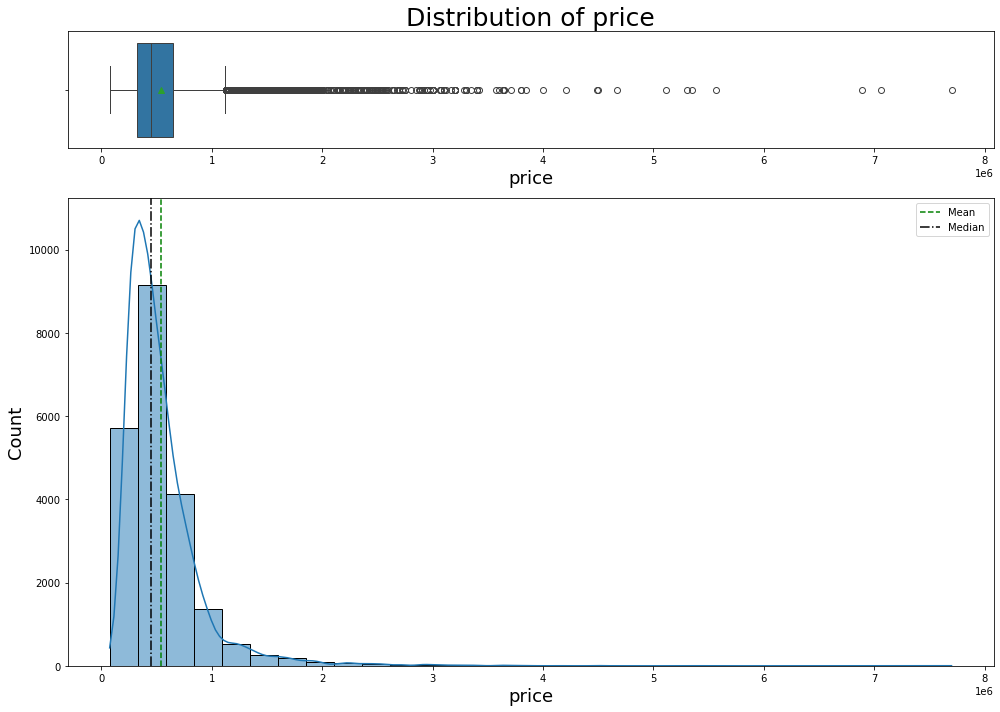

In [12]:
plot_histogram_and_boxplot(df, 'price')


*   Mean is $ 540,182
*   However most property prices lie below the mean. Median for property prices is lesser than mean.
*   Therefore, the distribution for property prices is positively skewed
*   Mean is higher, suggesting that there are some relatively expensive properties in the dataset that are pulling the average up. This can be observed in the boxplot









#### Distribution of Living Measure

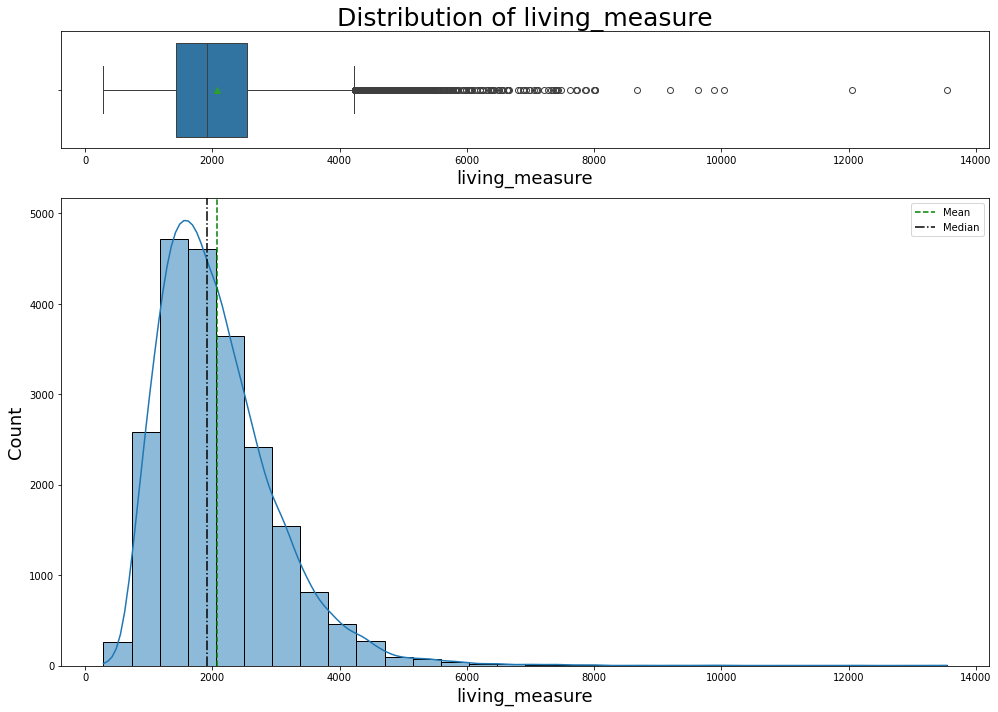

In [13]:
plot_histogram_and_boxplot(df, 'living_measure')

#### Distribution of Lot Measure

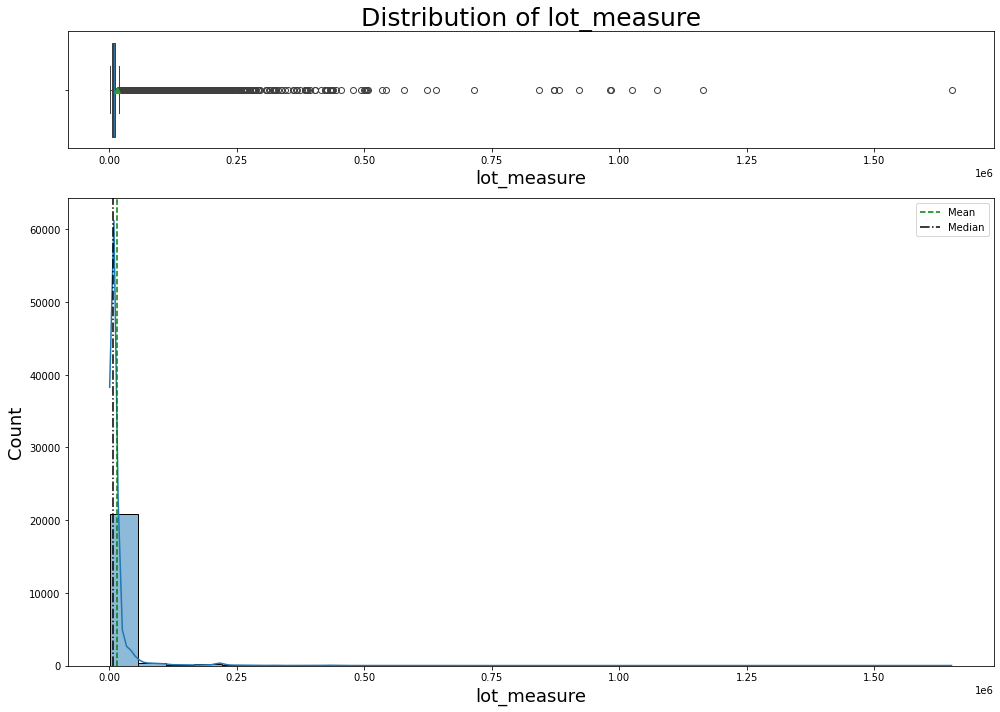

In [14]:
plot_histogram_and_boxplot(df, 'lot_measure')

#### Distribution of Ceiling Measure

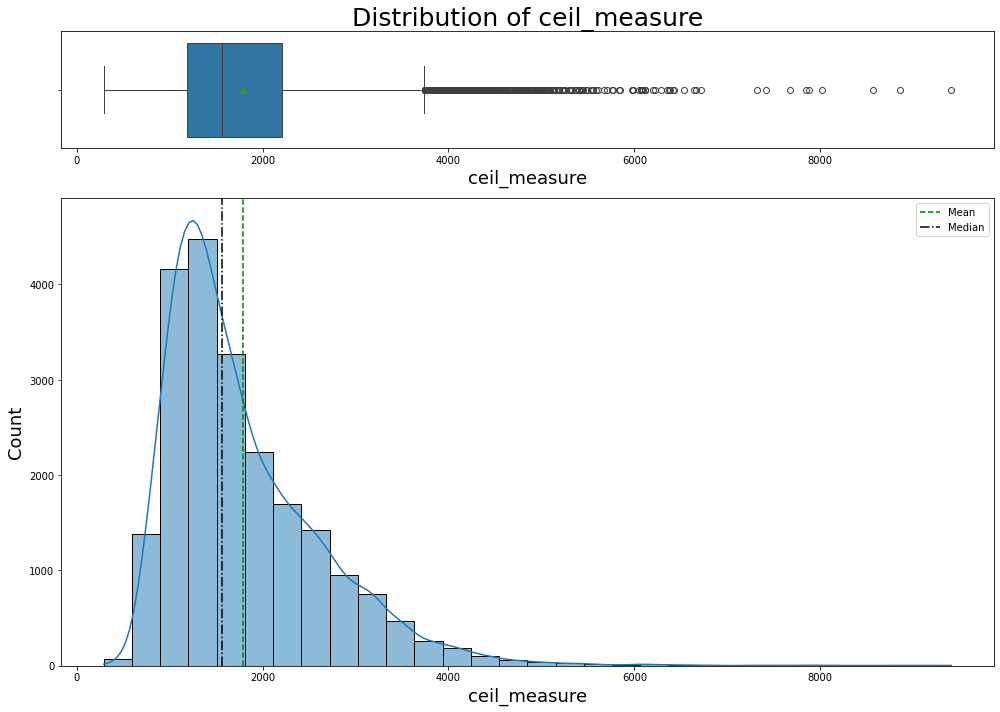

In [15]:
plot_histogram_and_boxplot(df, 'ceil_measure')

#### Distribution of Basement Measure

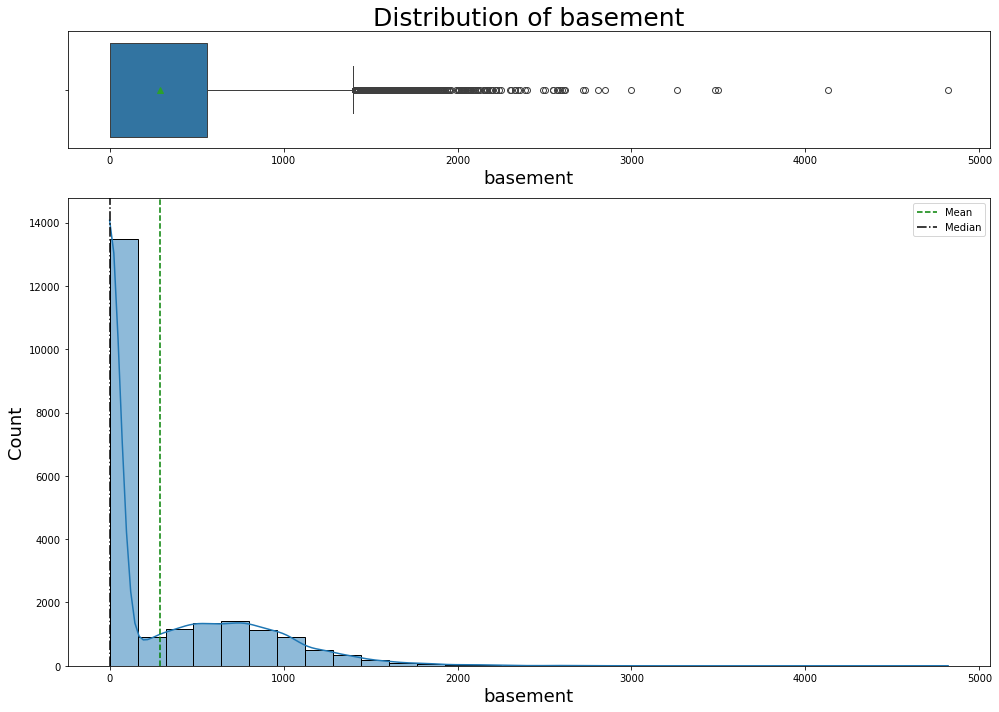

In [16]:
plot_histogram_and_boxplot(df, 'basement')

#### Distribution of Year Built

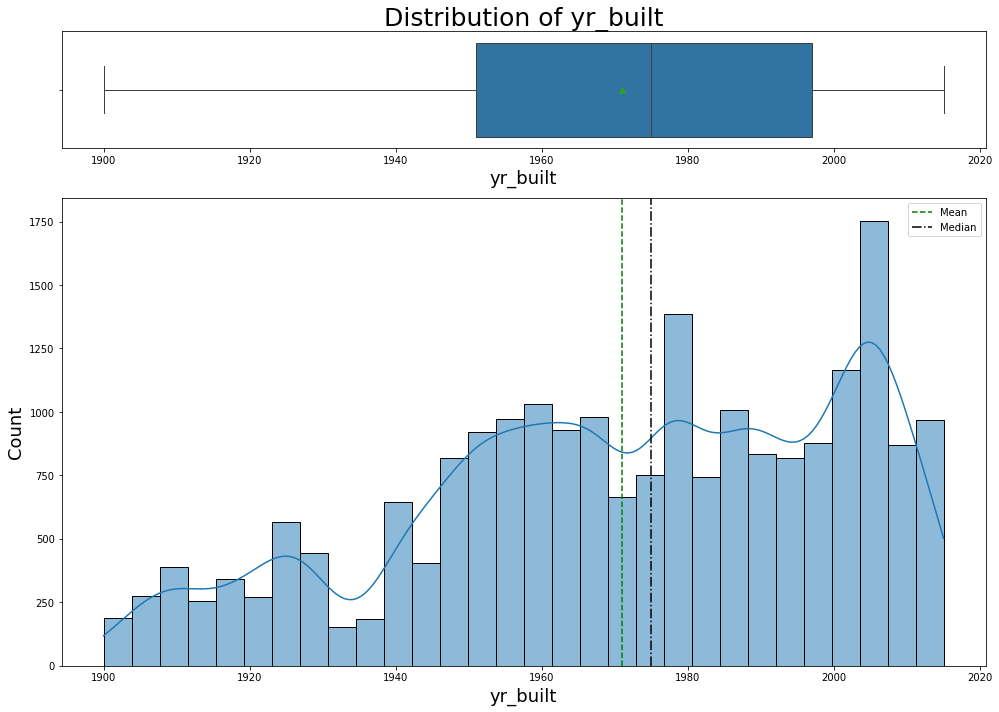

In [17]:
plot_histogram_and_boxplot(df, 'yr_built')

#### Distribution of Year Renovated

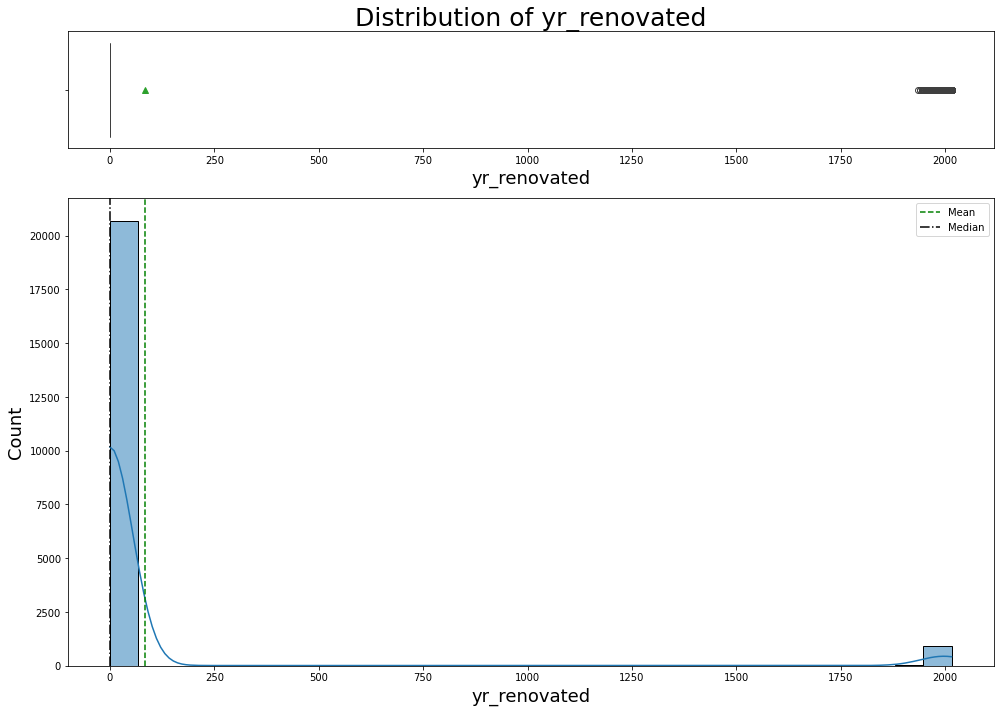

In [18]:
plot_histogram_and_boxplot(df, 'yr_renovated')

#### Distribution of Latitude

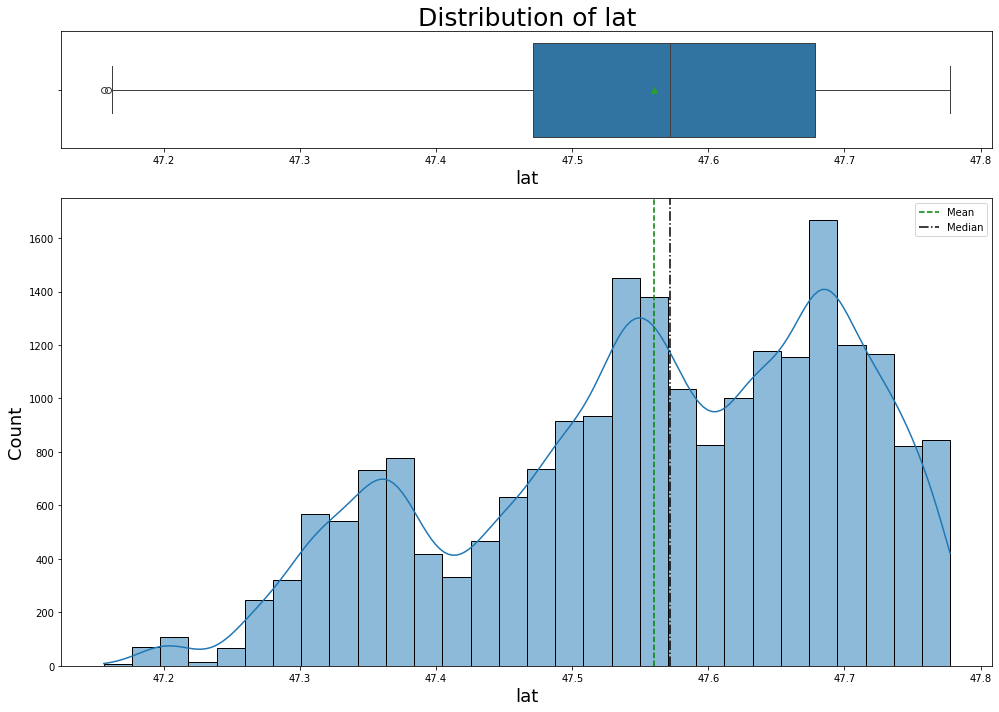

In [19]:
plot_histogram_and_boxplot(df, 'lat')

#### Distribution of Longitute

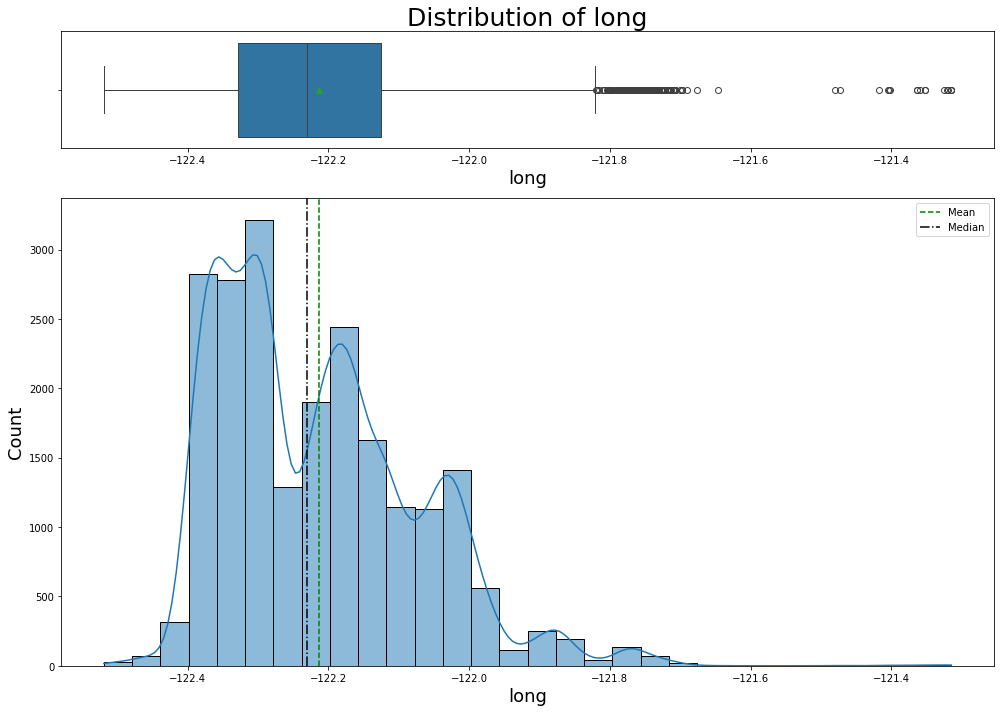

In [20]:
plot_histogram_and_boxplot(df, 'long')

#### Distribution of Living Area as in 2015

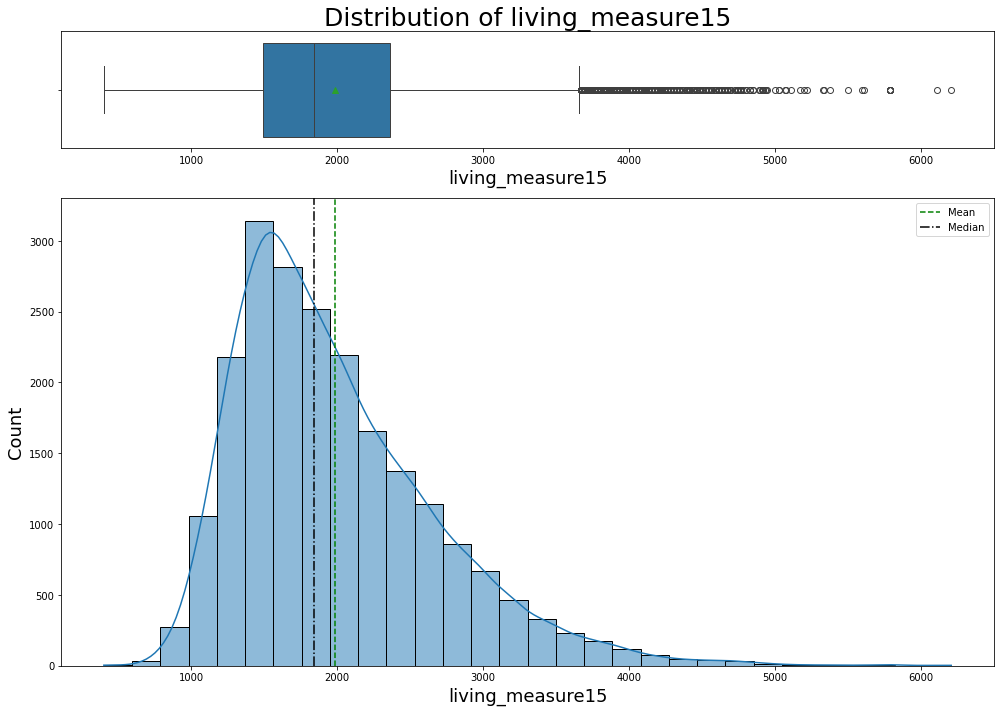

In [21]:
plot_histogram_and_boxplot(df, 'living_measure15')

#### Distribution of Lot Area as in 2015

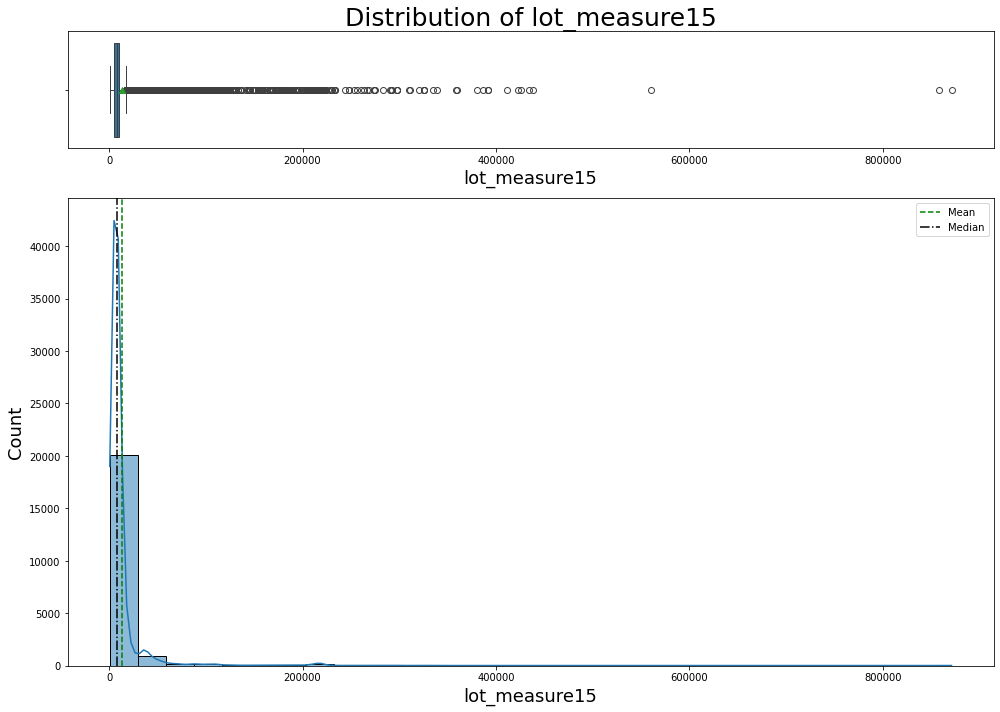

In [22]:
plot_histogram_and_boxplot(df, 'lot_measure15')

#### Distribution of Total Area

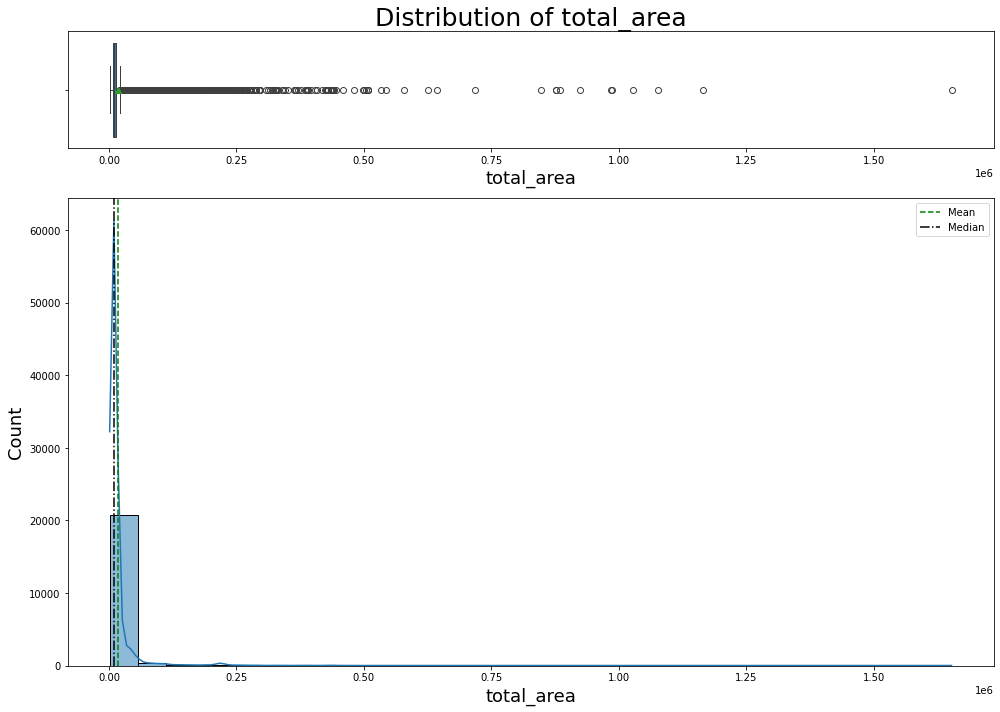

In [23]:
plot_histogram_and_boxplot(df, 'total_area')

#### Countplot of Houses by Number of Bedrooms

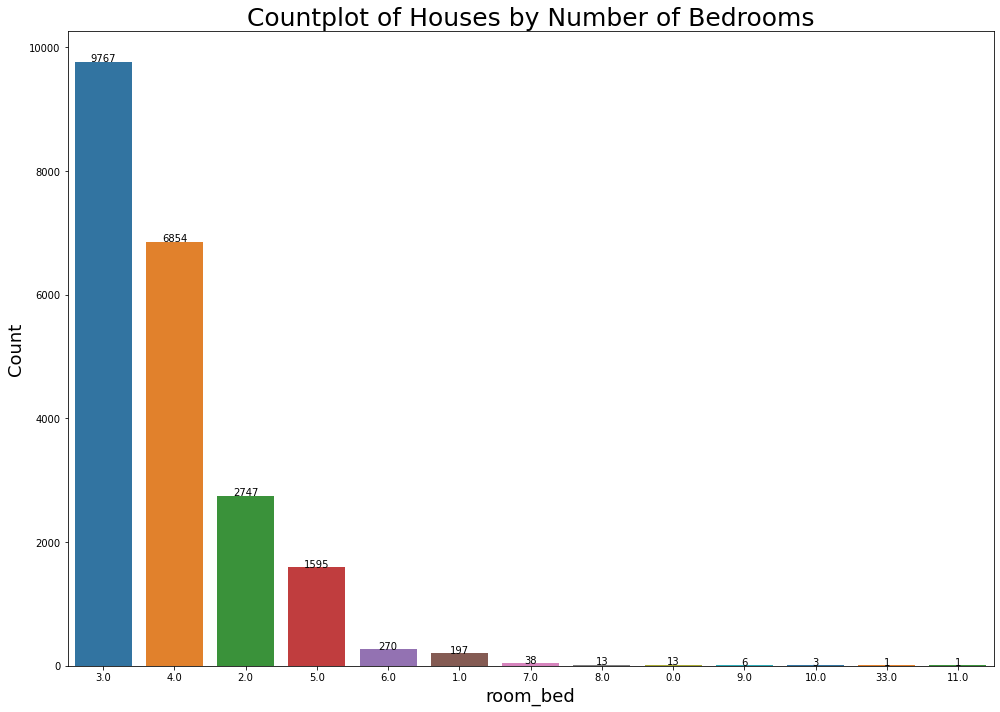

In [24]:
countplot_labeled(df, 'room_bed', title="Countplot of Houses by Number of Bedrooms")


*   Most houses have 3 bedrooms, followed by 4, 2, 5, 6, 1 and 7 bedrooms.






#### Countplot of Houses by Number of Bathrooms

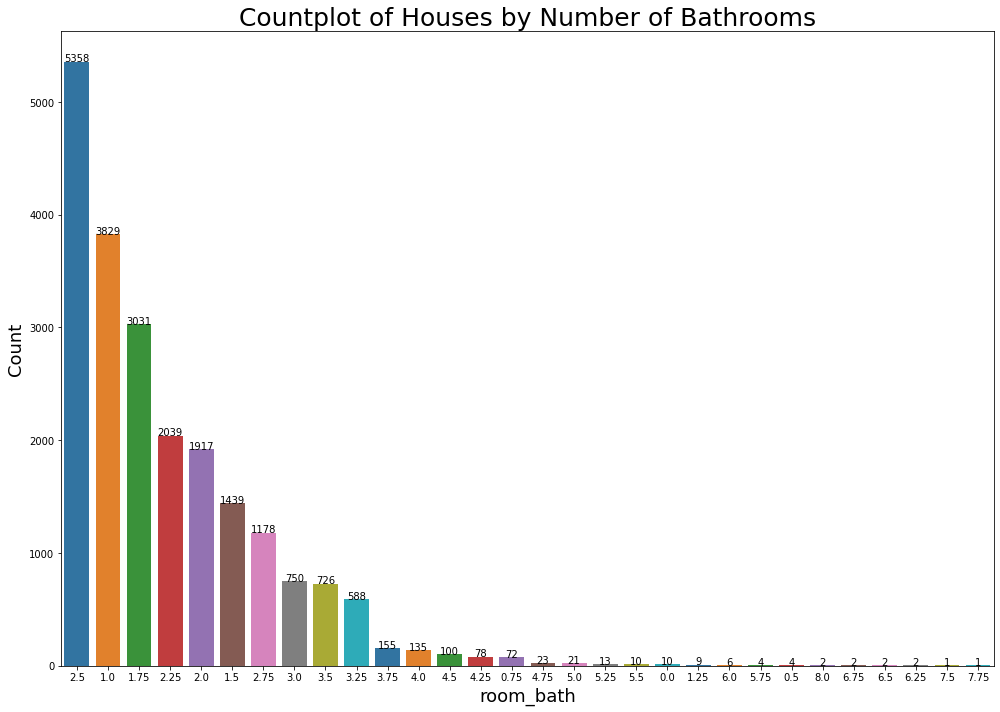

In [25]:
countplot_labeled(df, 'room_bath', title="Countplot of Houses by Number of Bathrooms")



*   Maximum number of houses have 2.5 bathrooms closely followed by 1 bathroom.


#### Countplot of Houses by Total Floors

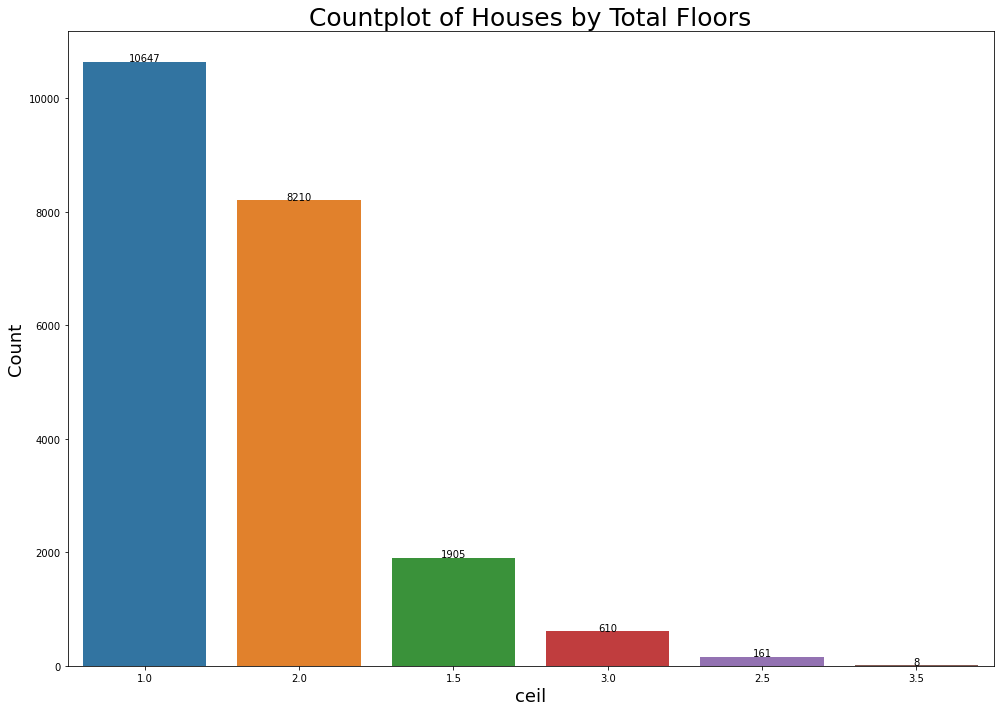

In [26]:
countplot_labeled(df, 'ceil', title="Countplot of Houses by Total Floors")



*   Most properties have 1 floor, followed by 2, 1.5, 3 and 2.5.



#### Countplot of Houses by Waterfront View of the Property

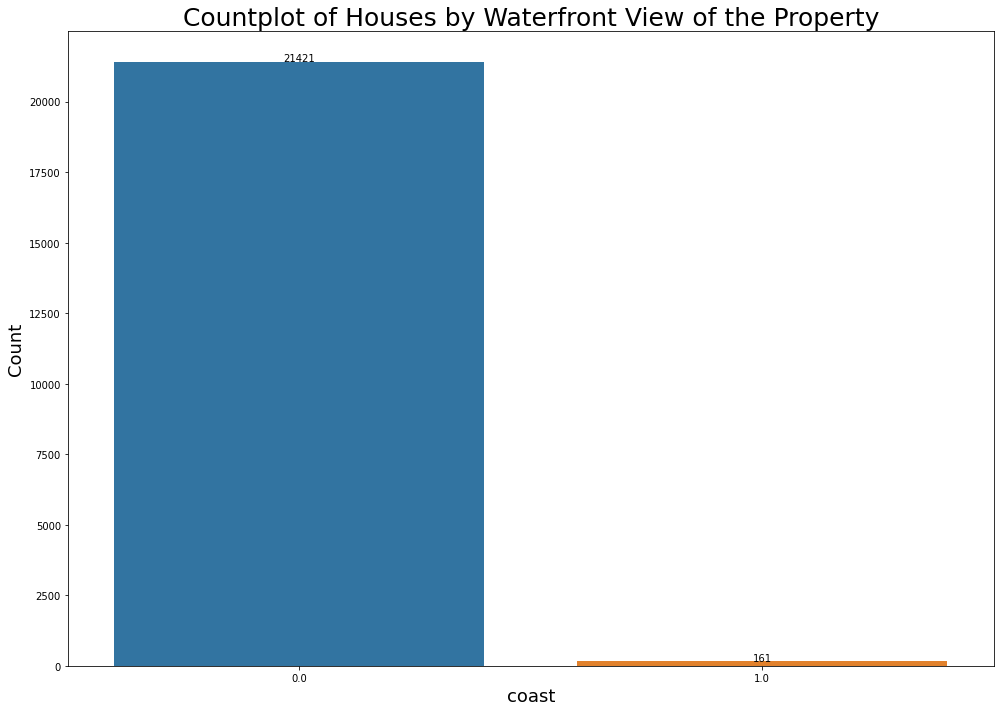

In [27]:
countplot_labeled(df, 'coast', title="Countplot of Houses by Waterfront View of the Property")



*   Most properties don't have a waterfront view
*   Only 161 properties have a waterfront view





#### Countplot of Houses by Number of Visits by Customers

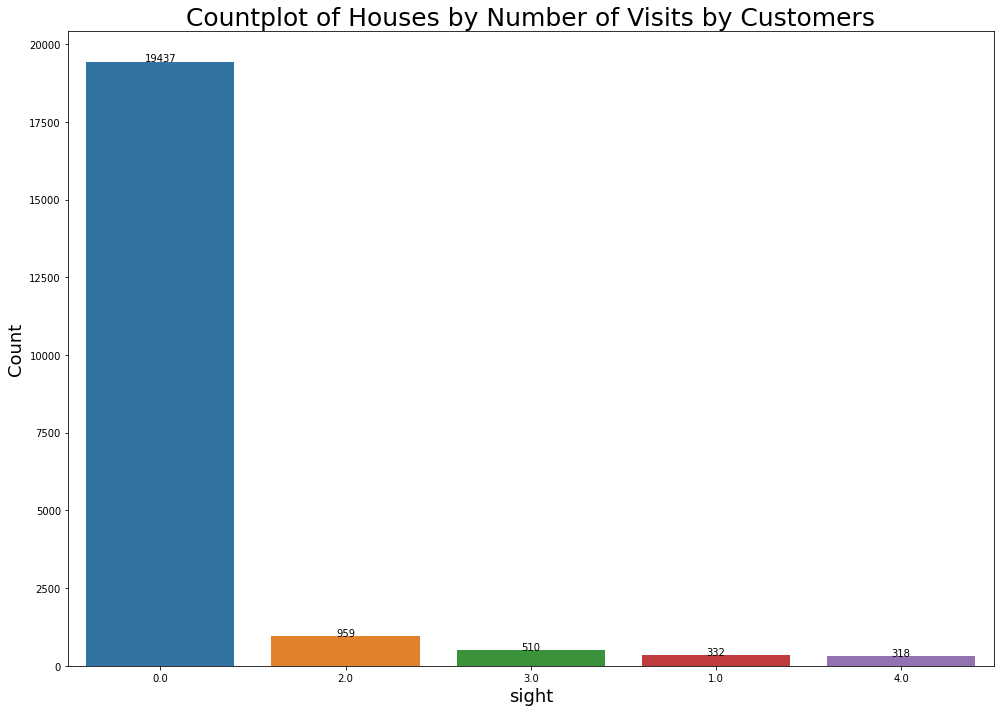

In [28]:
countplot_labeled(df, 'sight', title="Countplot of Houses by Number of Visits by Customers")



*   Most properties (19437) are not viewed at all by customers
*   This is closely followed by 2 visits, 3 visits, 1 visit and 4 visits respectively.





#### Countplot of Houses by Condition of the Property

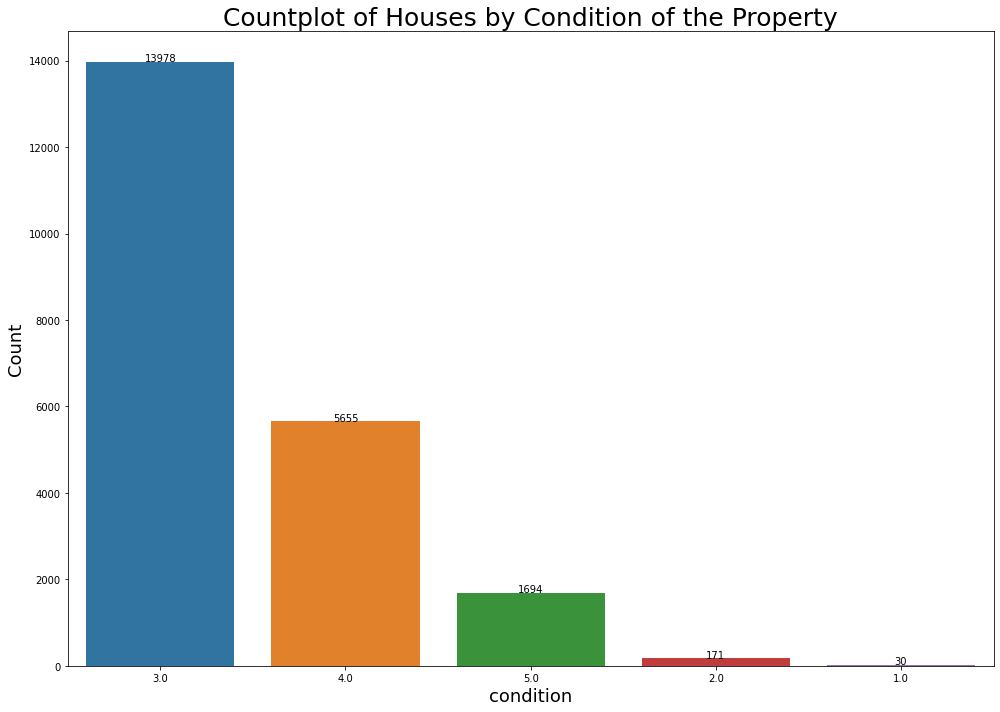

In [29]:
countplot_labeled(df, 'condition', title="Countplot of Houses by Condition of the Property")



*   Most property's condition is rated at 3




#### Countplot of Houses by Quality Score of the Property

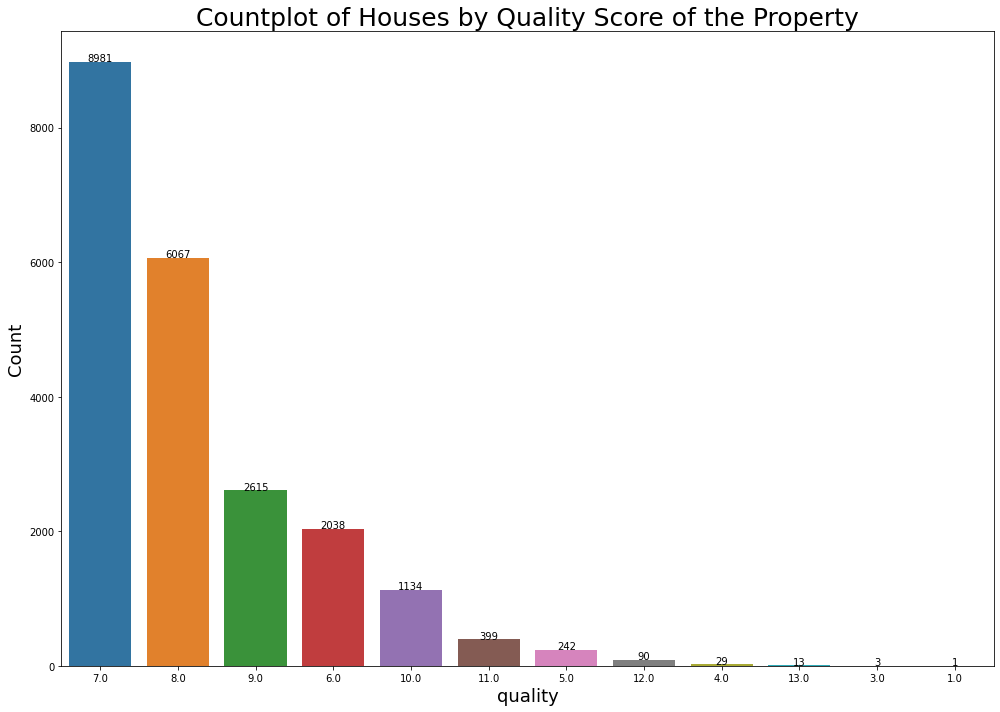

In [30]:
countplot_labeled(df, 'quality', title="Countplot of Houses by Quality Score of the Property")



*   Most house quality is rated at 7, closely followed by 8.




#### Countplot of Houses by Location

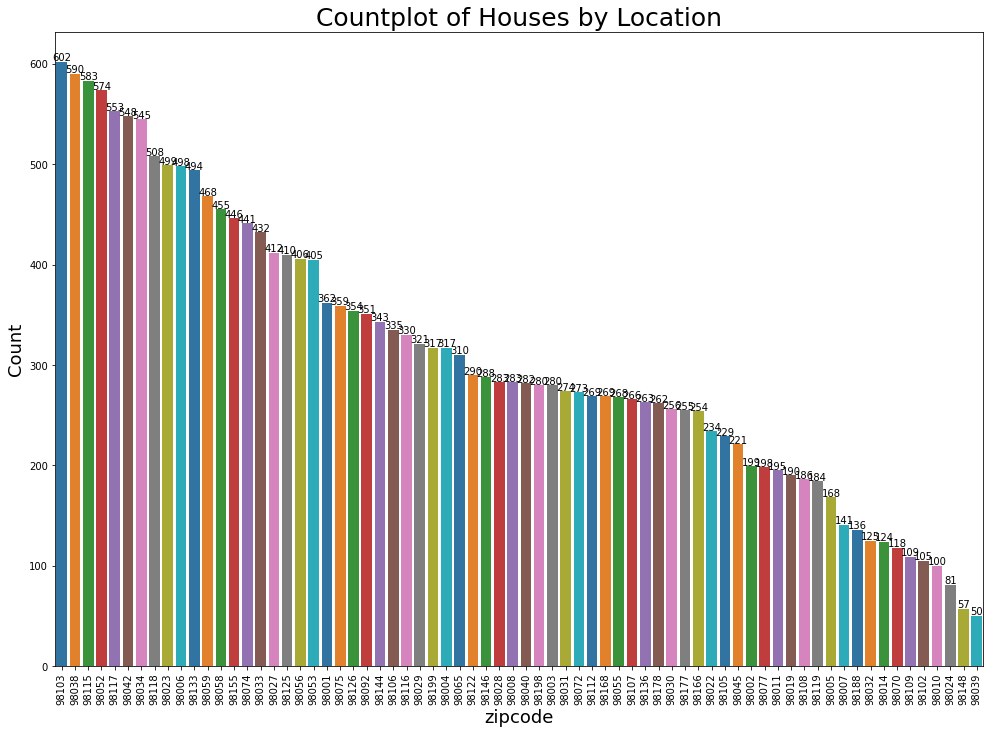

In [31]:
countplot_labeled(df, 'zipcode', title="Countplot of Houses by Location", xtick_rotation=90)



*   98103 is the most popular zipcode amongst the properties



#### Countplot of Houses by Furnishing Condition of the Property

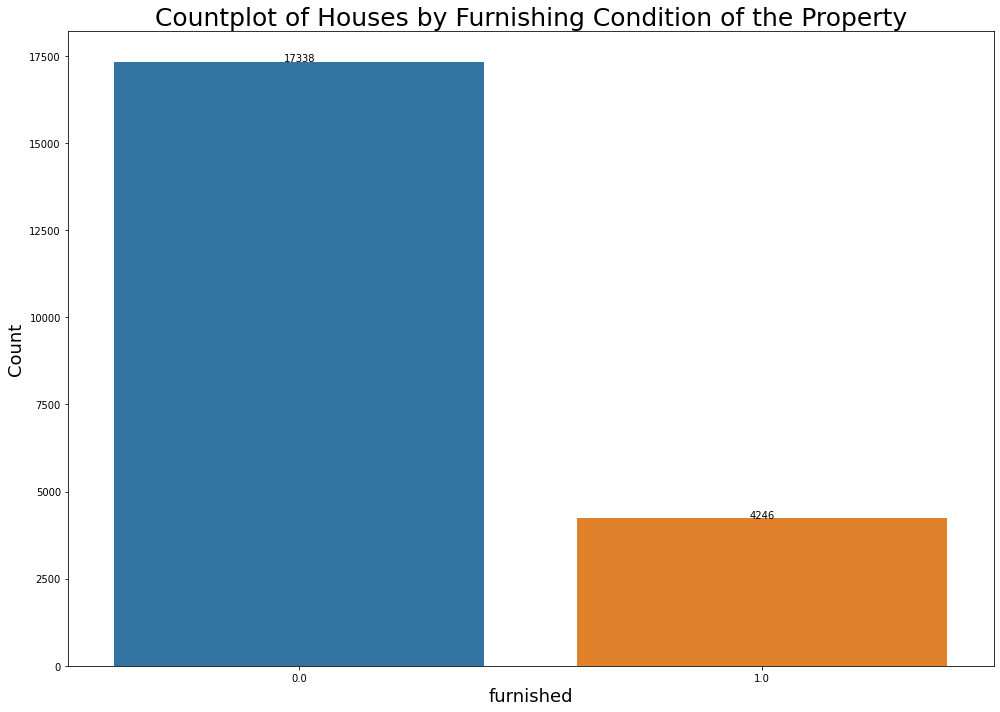

In [32]:
countplot_labeled(df, 'furnished', title="Countplot of Houses by Furnishing Condition of the Property")



*   Majority of the houses (17338) are not furnished




### Bivariate Analysis

#### Distribution of Price by Number of Bedrooms

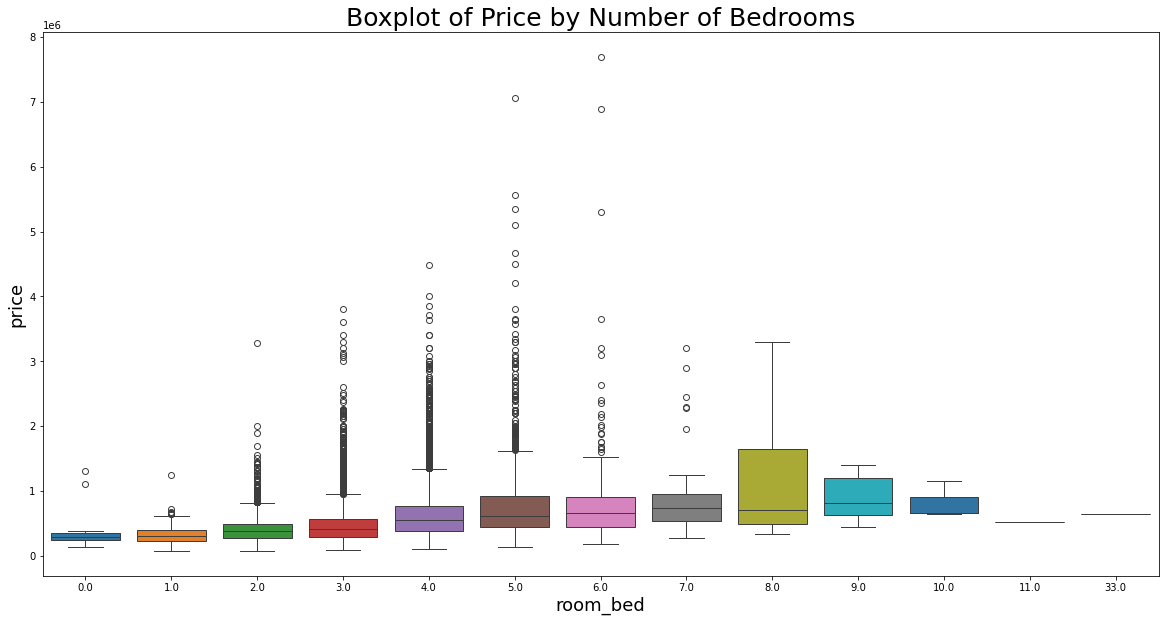

In [33]:
# Boxplot of Price by Number of Bedrooms

plt.figure(figsize=(20, 10))
sns.boxplot(x='room_bed', y='price', data=df.sort_values("room_bed", ascending=True), palette='tab10')
plt.title('Boxplot of Price by Number of Bedrooms', fontsize = 25)
plt.xlabel('room_bed', fontsize = 18)
plt.ylabel('price', fontsize = 18)
plt.show()

#### Distribution of Price by Number of Bathrooms

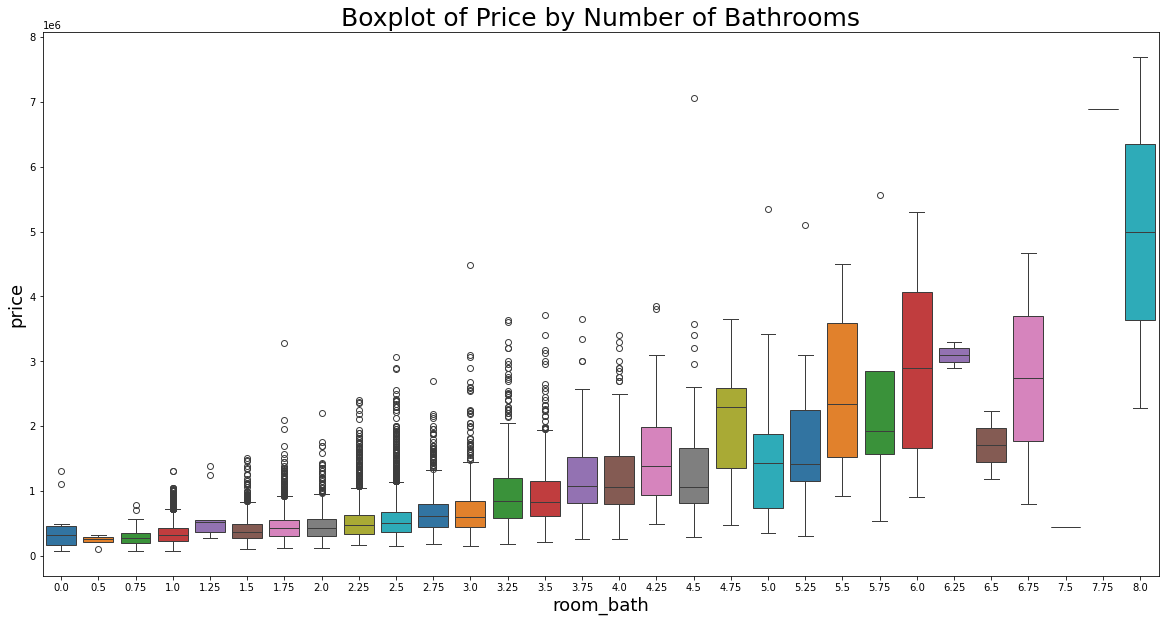

In [34]:
# Boxplot of Price by Number of Bathrooms

plt.figure(figsize=(20, 10))
sns.boxplot(x='room_bath', y='price', data=df.sort_values("room_bath", ascending=True), palette='tab10')
plt.title('Boxplot of Price by Number of Bathrooms', fontsize = 25)
plt.xlabel('room_bath', fontsize = 18)
plt.ylabel('price', fontsize = 18)
plt.show()

#### Distribution of Price by Number of Floors

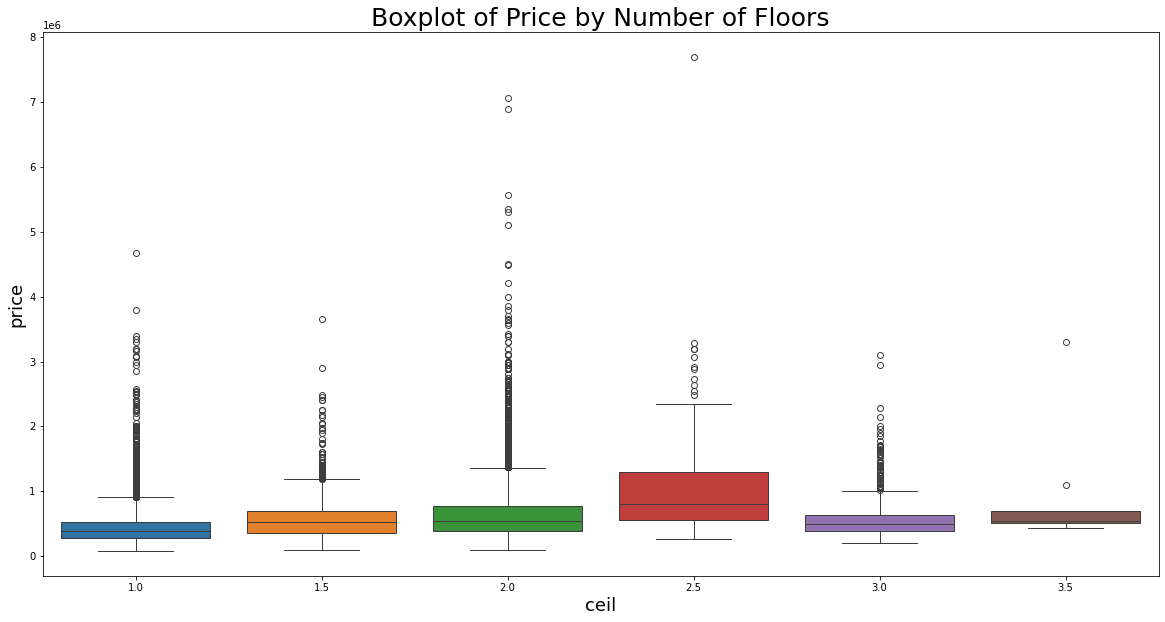

In [35]:
# Boxplot of Price by Number of Floors

plt.figure(figsize=(20, 10))
sns.boxplot(x='ceil', y='price', data=df.sort_values("ceil", ascending=True), palette='tab10')
plt.title('Boxplot of Price by Number of Floors', fontsize = 25)
plt.xlabel('ceil', fontsize = 18)
plt.ylabel('price', fontsize = 18)
plt.show()

#### Distribution of Price by Waterfront View

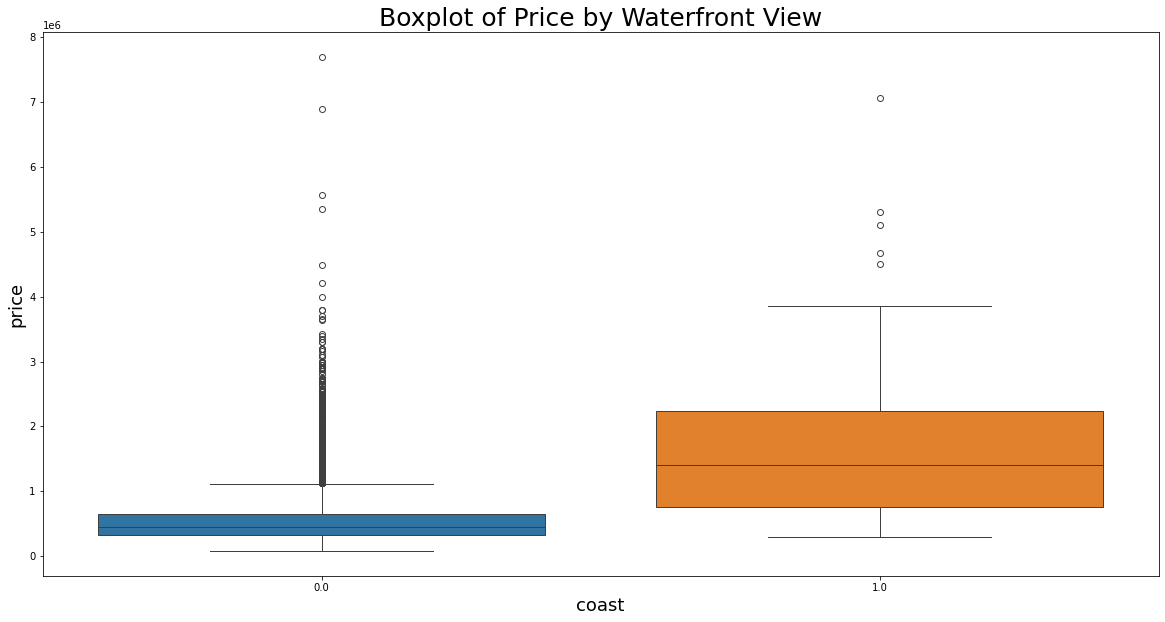

In [36]:
# Boxplot of Price by Waterfront View

plt.figure(figsize=(20, 10))
sns.boxplot(x='coast', y='price', data=df.sort_values("coast", ascending=True), palette='tab10')
plt.title('Boxplot of Price by Waterfront View', fontsize = 25)
plt.xlabel('coast', fontsize = 18)
plt.ylabel('price', fontsize = 18)
plt.show()




*  Properties which have a waterfront view tend to demand higher prices than those



#### Distribution of Price by Number of Visits by Customers

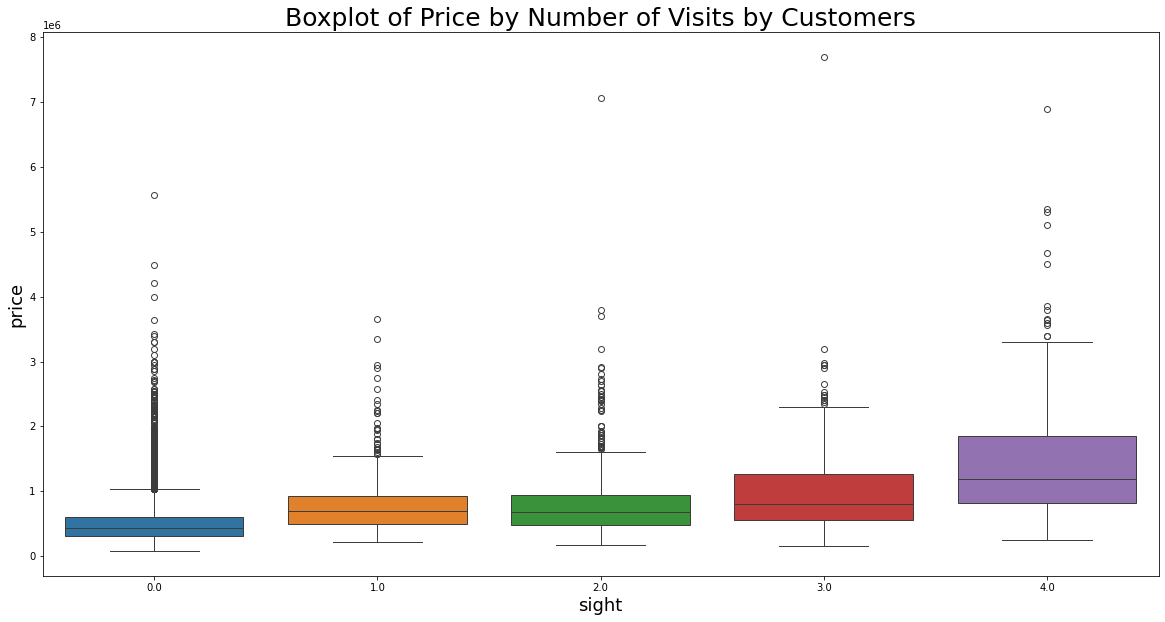

In [37]:
# Boxplot of Price by Number of Visits by Customers

plt.figure(figsize=(20, 10))
sns.boxplot(x='sight', y='price', data=df.sort_values("sight", ascending=True), palette='tab10')
plt.title('Boxplot of Price by Number of Visits by Customers', fontsize = 25)
plt.xlabel('sight', fontsize = 18)
plt.ylabel('price', fontsize = 18)
plt.show()




*   Properties which are vidited 4 times tend to have higher prices than those which are visited less frequently

#### Distribution of Price by Condition Rating

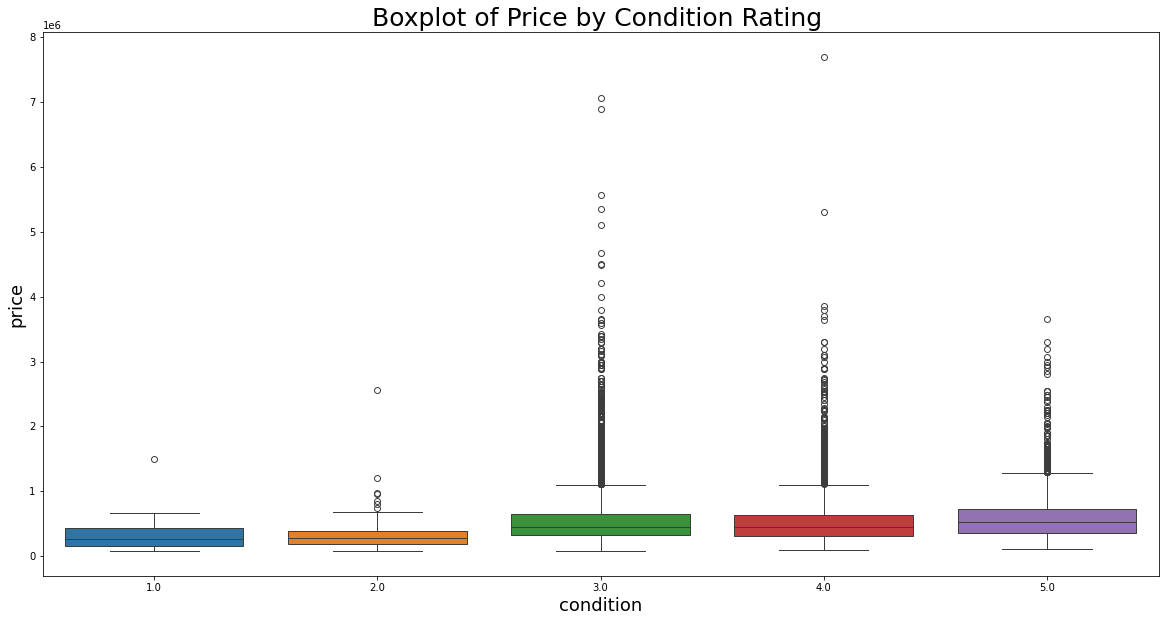

In [38]:
# Boxplot of Price by Condition Rating

plt.figure(figsize=(20, 10))
sns.boxplot(x='condition', y='price', data=df.sort_values("condition", ascending=True), palette='tab10')
plt.title('Boxplot of Price by Condition Rating ', fontsize = 25)
plt.xlabel('condition', fontsize = 18)
plt.ylabel('price', fontsize = 18)
plt.show()

#### Distribution of Price by Quality Score of the Property

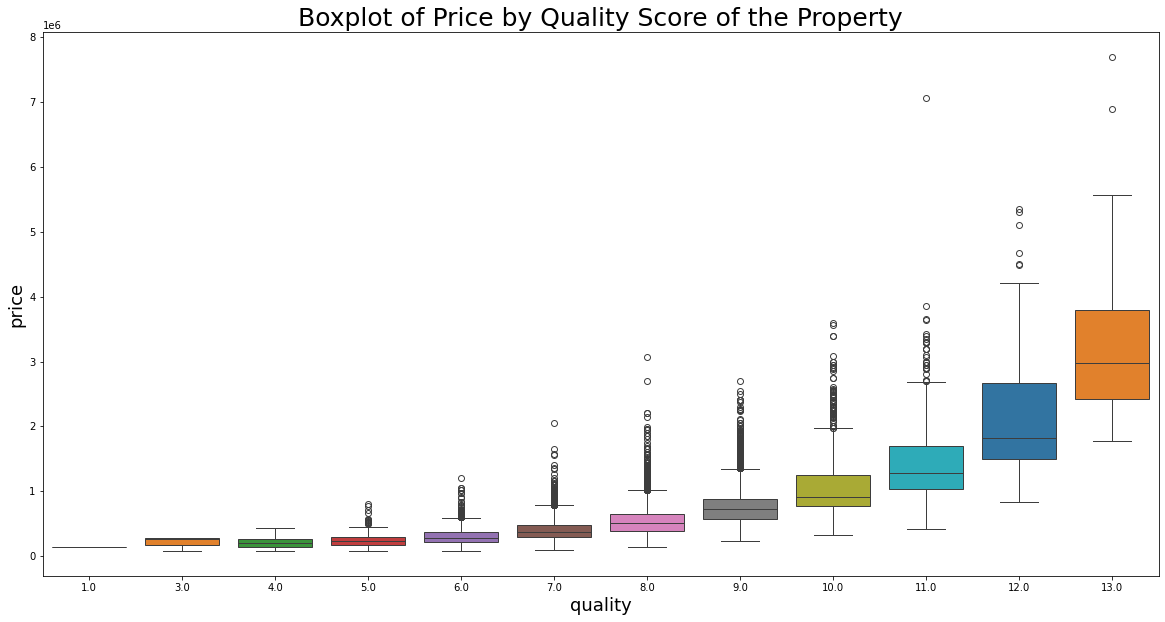

In [39]:
# Boxplot of Price by Quality Score of the Property

plt.figure(figsize=(20, 10))
sns.boxplot(x='quality', y='price', data=df.sort_values("quality", ascending=True), palette='tab10')
plt.title('Boxplot of Price by Quality Score of the Property', fontsize = 25)
plt.xlabel('quality', fontsize = 18)
plt.ylabel('price', fontsize = 18)
plt.show()



*   It can be observed that as the quality score of the property increases, so does the property's ability to demand for higher prices


#### Distribution of Price by Location of the Property

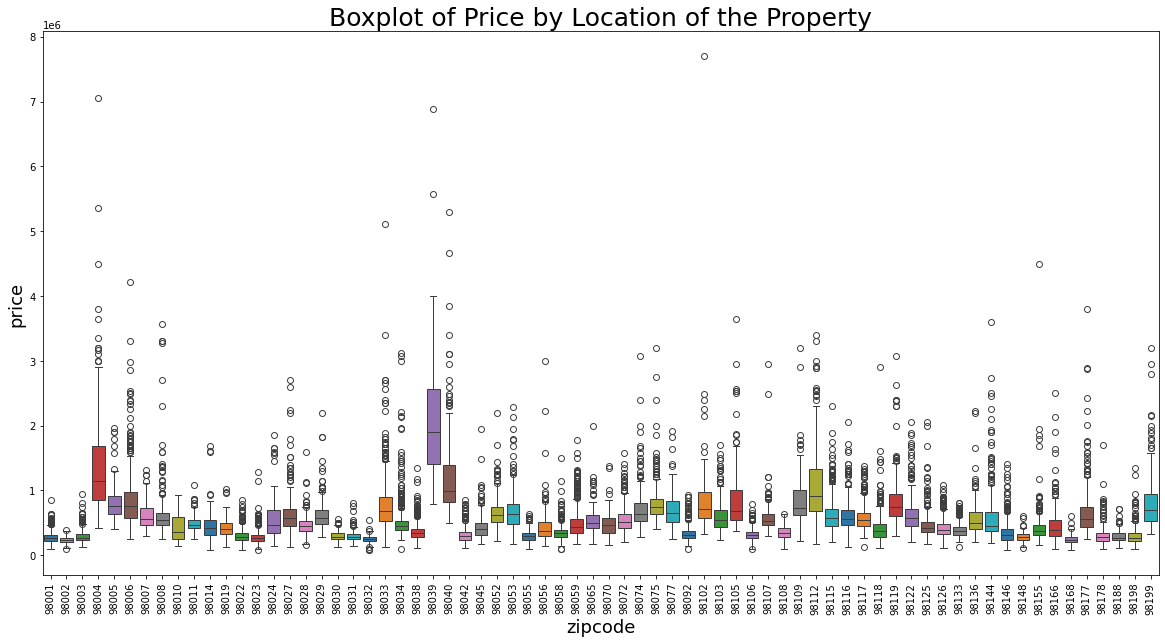

In [40]:
# Boxplot of Price by Location of the Property

plt.figure(figsize=(20, 10))
sns.boxplot(x='zipcode', y='price', data=df.sort_values("zipcode", ascending=True), palette='tab10')
plt.title('Boxplot of Price by Location of the Property', fontsize = 25)
plt.xlabel('zipcode', fontsize = 18)
plt.ylabel('price', fontsize = 18)
plt.xticks(rotation=90)
plt.show()



*   Certain zipcodes stand out in their ability to attract higher prices, for instance houses belonging to the zipcode 98039 can be observed to demand a significantly higher property rate



#### Distribution of Price by Furnishing Status

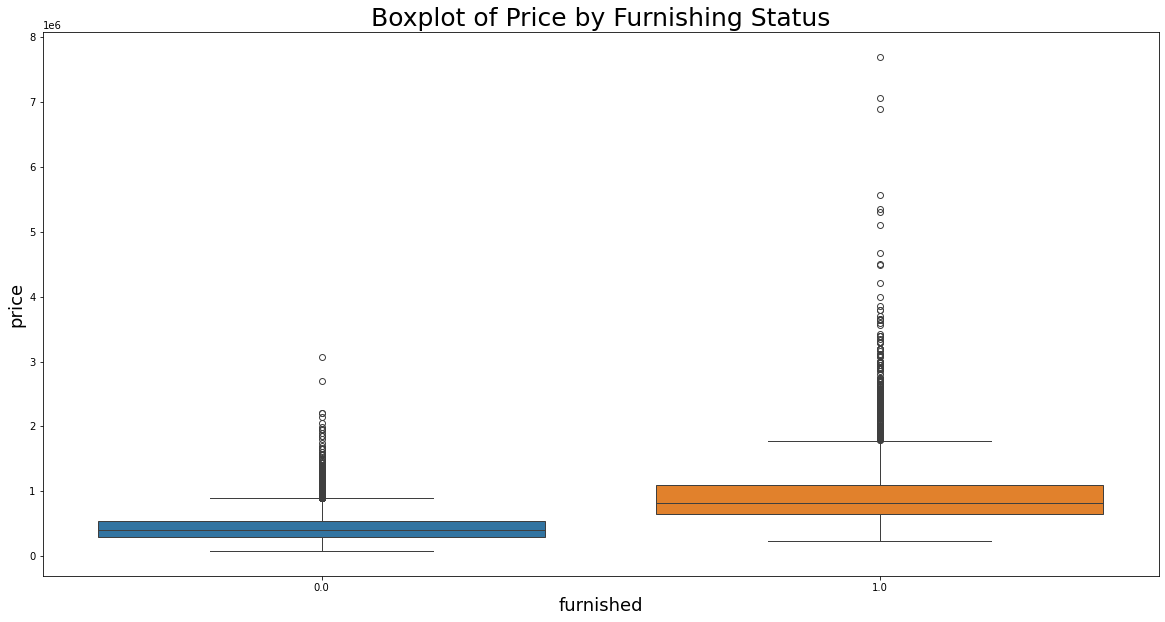

In [41]:
# Boxplot of Price by Furnishing Status

plt.figure(figsize=(20, 10))
sns.boxplot(x='furnished', y='price', data=df.sort_values("furnished", ascending=True), palette='tab10')
plt.title('Boxplot of Price by Furnishing Status', fontsize = 25)
plt.xlabel('furnished', fontsize = 18)
plt.ylabel('price', fontsize = 18)
#plt.xticks(rotation=90)
plt.show()



*   Furnished houses (represented by 1) can be observed to attract higher prices than unfurnished houses (represented by 0).

### Multivariate Analysis

#### Pairplot

In [42]:
"""# Create a pairplot with KDE on the diagonal
sns.pairplot(df, diag_kind="kde", palette="viridis");"""

'# Create a pairplot with KDE on the diagonal\nsns.pairplot(df, diag_kind="kde", palette="viridis");'

#### Correlation Heatmap

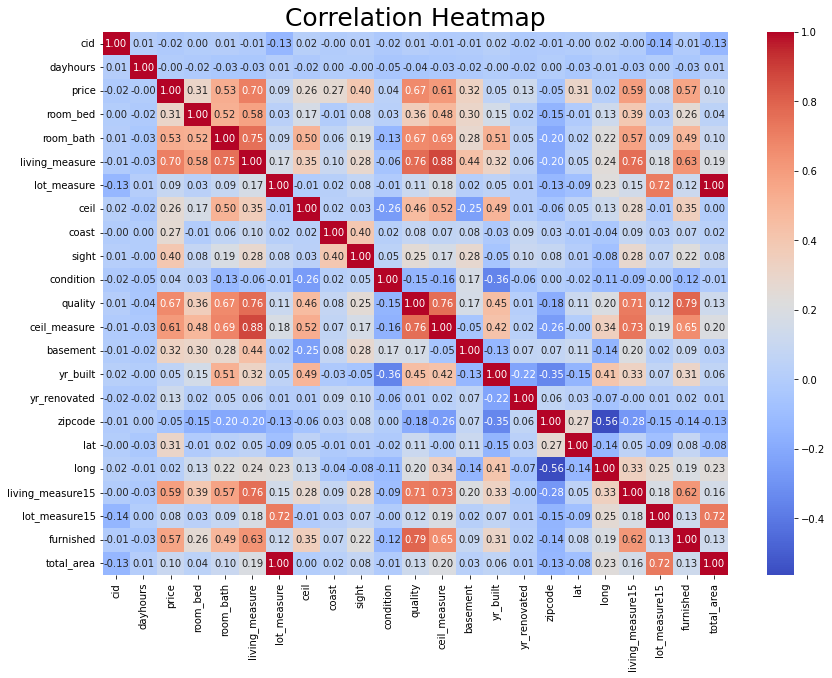

In [43]:
# Getting the correlation matrix
correlation_matrix = df.corr()

# Plotting the Heatmap using correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap', fontsize = 25)
plt.show()


Closely inspecting attributes influencing Price:
*   Price and living measure are strongly positively correlated
*   There also exists a significant correlation between the quality and the price of the property
*   Moderately significant correlation exists between the furnished status and the price of the property
*   Moderately significant correlation exists between the number of bathrooms and the price of the property

Inspecting Quality's interplay with other attributes:

*   Quality and furnished status are strongly positively correlated  
*   Quality and living measure are strongly positively correlated  
*   Quality and ceil measure are strongly positively correlated
*   Quality and price show significant correlation
*.  Quality and bathrooms show significant positive correlation










## Data pre-processing

### Duplicates Check

In [44]:
# Checking for any duplicated rows
duplicates = df.duplicated().sum()
print("Number of Duplicates:", duplicates)

Number of Duplicates: 0


### Missing value treatment

In [45]:
df.isnull().sum()

cid                   0
dayhours              0
price                 0
room_bed            108
room_bath           108
living_measure       17
lot_measure          42
ceil                 72
coast                31
sight                57
condition            85
quality               1
ceil_measure          1
basement              1
yr_built             15
yr_renovated          0
zipcode               0
lat                   0
long                 34
living_measure15    166
lot_measure15        29
furnished            29
total_area           68
dtype: int64

In [46]:
# Check for missing values in the dataframe
missing_values = df.isnull().any()

# Impute missing values with median for numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns
for column in numeric_columns:
    if missing_values[column]:
        df[column] = df[column].fillna(df[column].median())

In [47]:
df.isnull().sum()

cid                 0
dayhours            0
price               0
room_bed            0
room_bath           0
living_measure      0
lot_measure         0
ceil                0
coast               0
sight               0
condition           0
quality             0
ceil_measure        0
basement            0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
living_measure15    0
lot_measure15       0
furnished           0
total_area          0
dtype: int64

### Feature Engineering

In [48]:
# Change the data type of categorical columns to category
df['coast'] = df['coast'].astype('category')
df['furnished'] = df['furnished'].astype('category')

# Changing 'yr_renovated' to categorical as if there is a renovation or not
df['renovation'] = df['yr_renovated'].apply(lambda x: 0 if x == 0 else 1)

df['renovation'] = df['renovation'].astype('category')

In [49]:
# Calcuating age of the property and age of renovations, and adding them as columns in the dataframe
# Get the current year
current_year = datetime.datetime.now().year

# Calculate the age of the property
df['age_of_property'] = current_year - df['yr_built']

# Treating 0 in yr_renovated as not renovated and replacing them with corresponding yr_built value
df['yr_renovated'] = df.apply(lambda row: row['yr_built'] if row['yr_renovated'] == 0 else row['yr_renovated'], axis=1)

# Calculate the age of renovations
df['renovation_age'] = current_year - df['yr_renovated']

# Extract the year and month property was sold
df['yr_sold'] = df['dayhours'].dt.year
df['month_sold'] = df['dayhours'].dt.month

In [50]:
# As price is highly skewed, log transformation is applied
df['log_price'] = np.log(df['price'])
df['log_lot_measure'] = np.log(df['lot_measure'])
df['log_lot_measure15'] = np.log(df['lot_measure15'])

In [51]:
df.shape

(21613, 31)

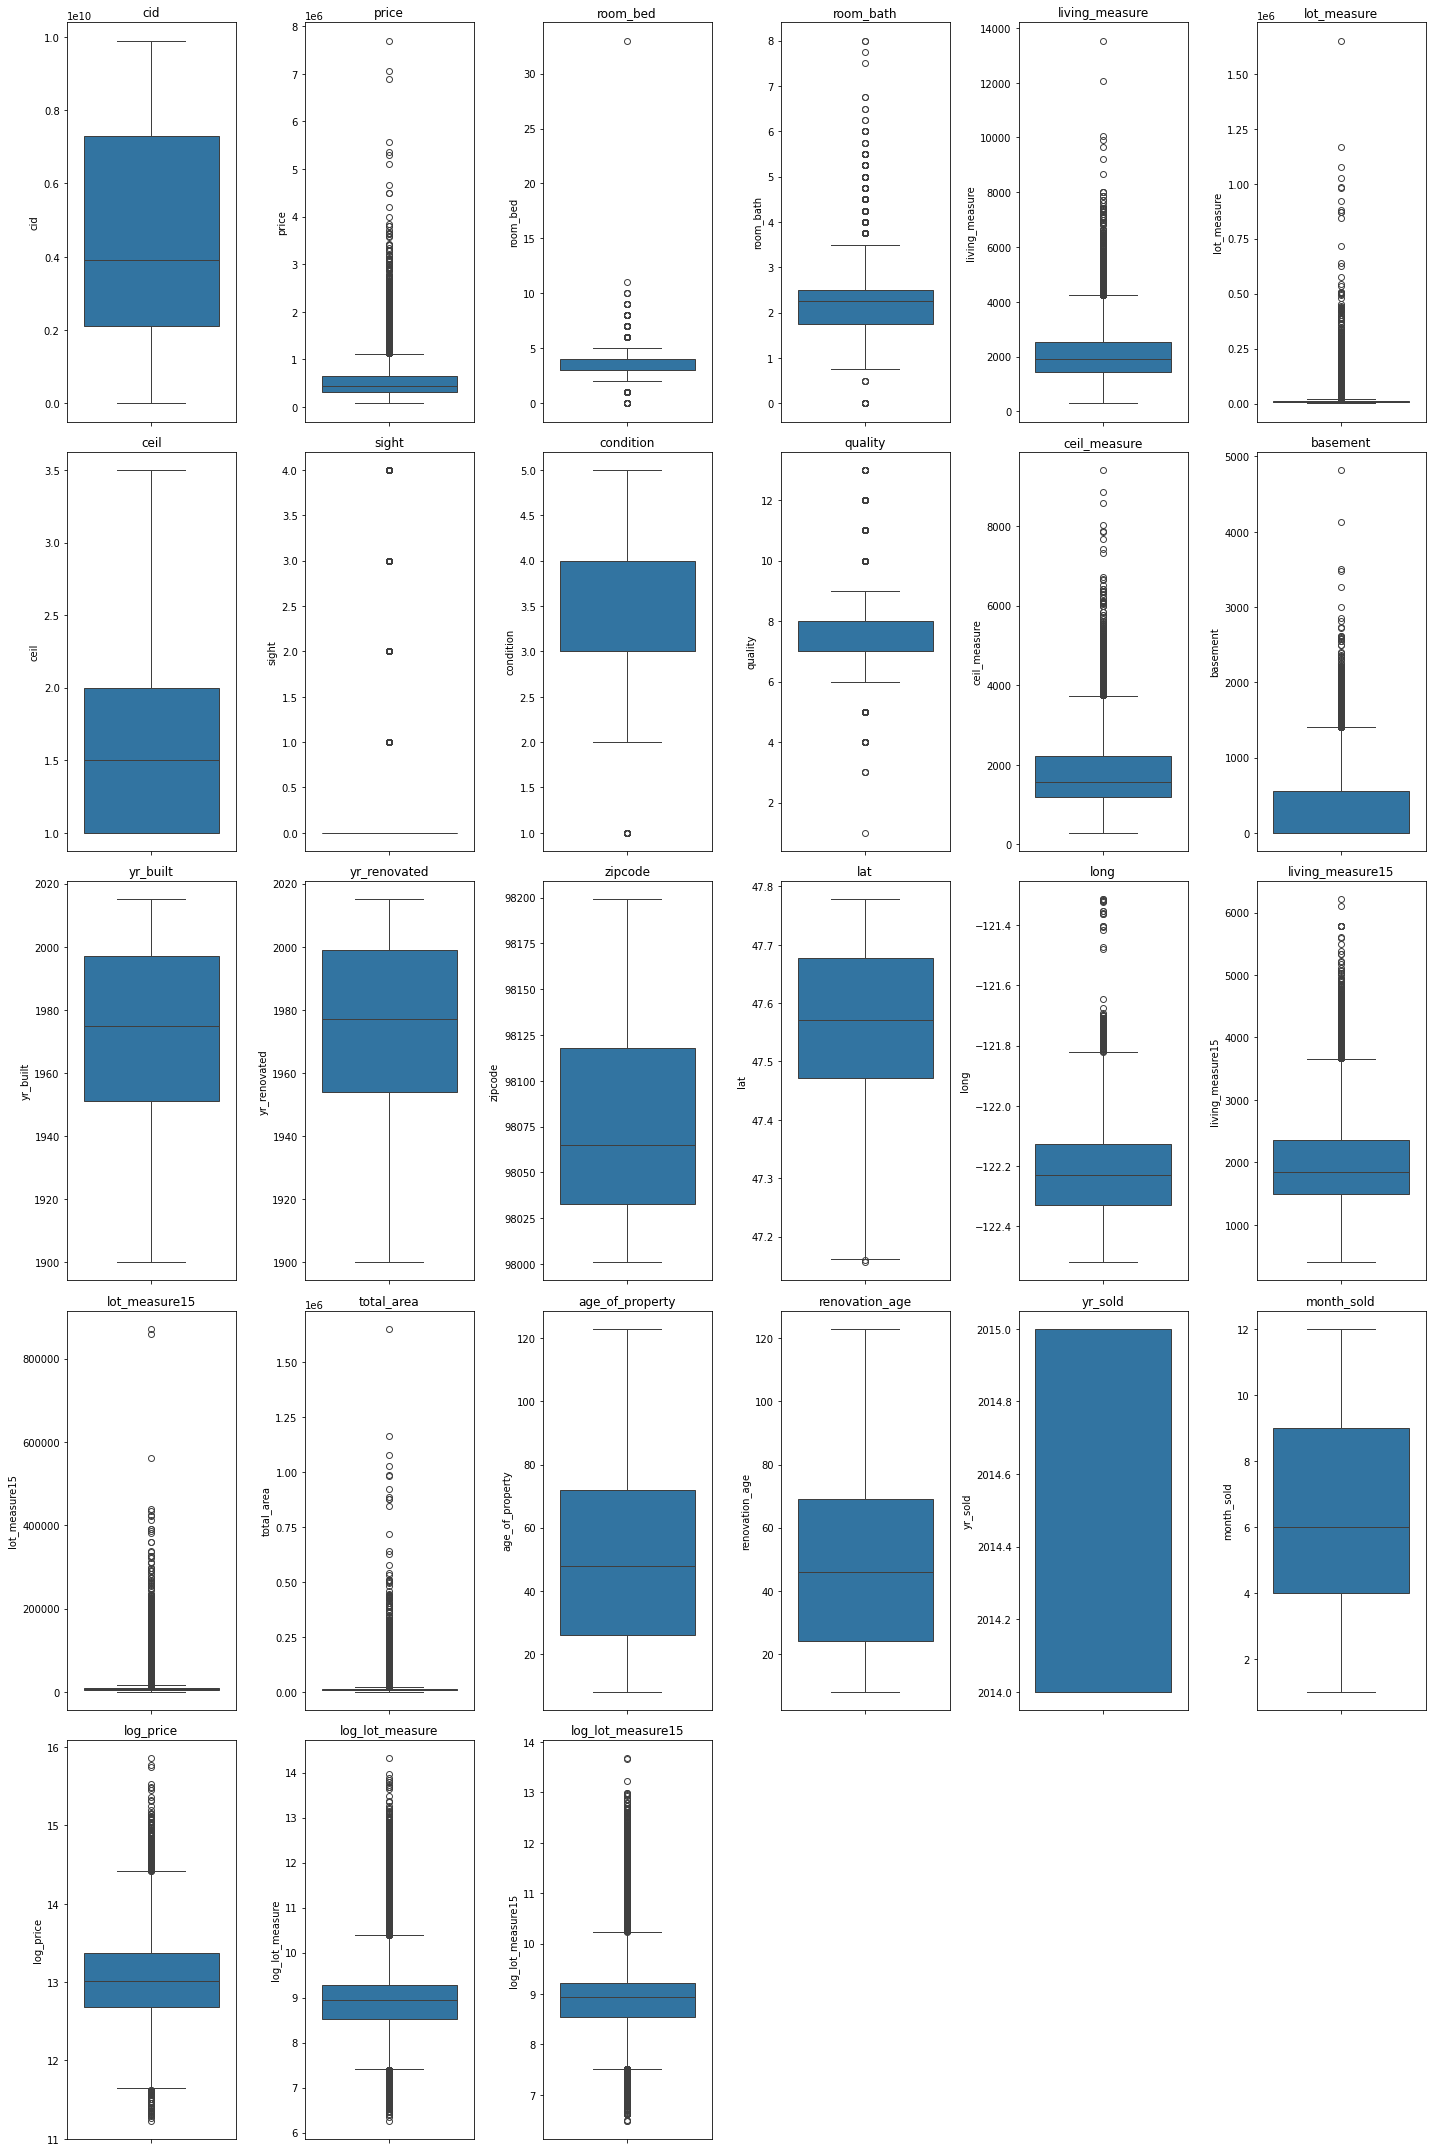

In [52]:
# Plotting the boxplots of all columns to check for outliers
numeric_columns = df.select_dtypes(include = np.number).columns.to_list()

plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5,6, i + 1)
    sns.boxplot(y = df[variable])
    plt.tight_layout()
    plt.title(variable)

plt.show()

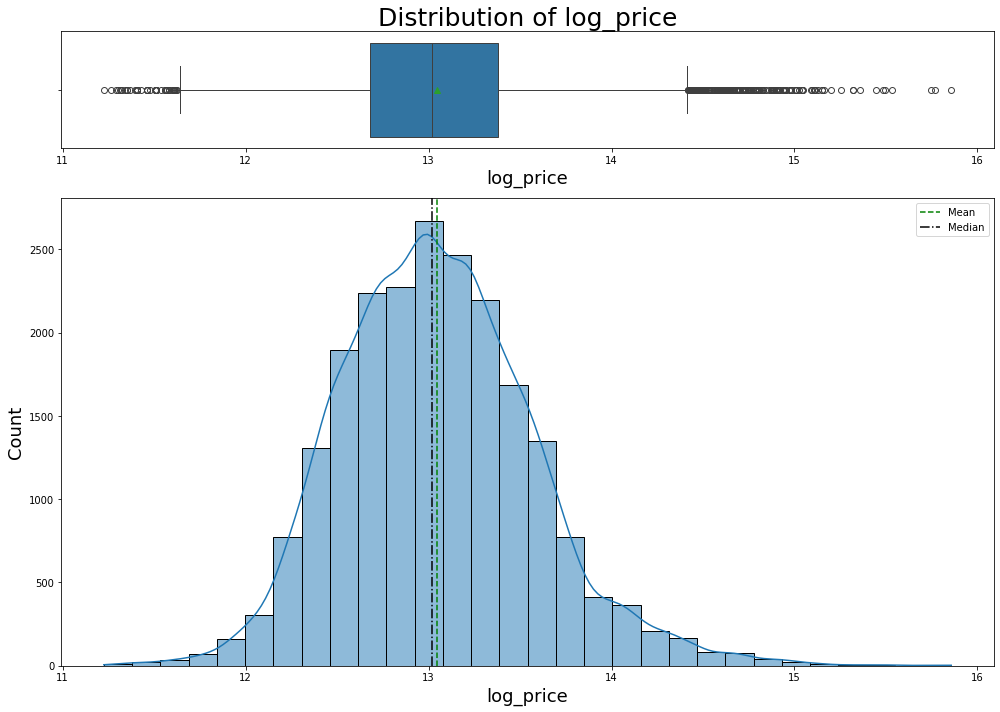

In [53]:
plot_histogram_and_boxplot(df, 'log_price')

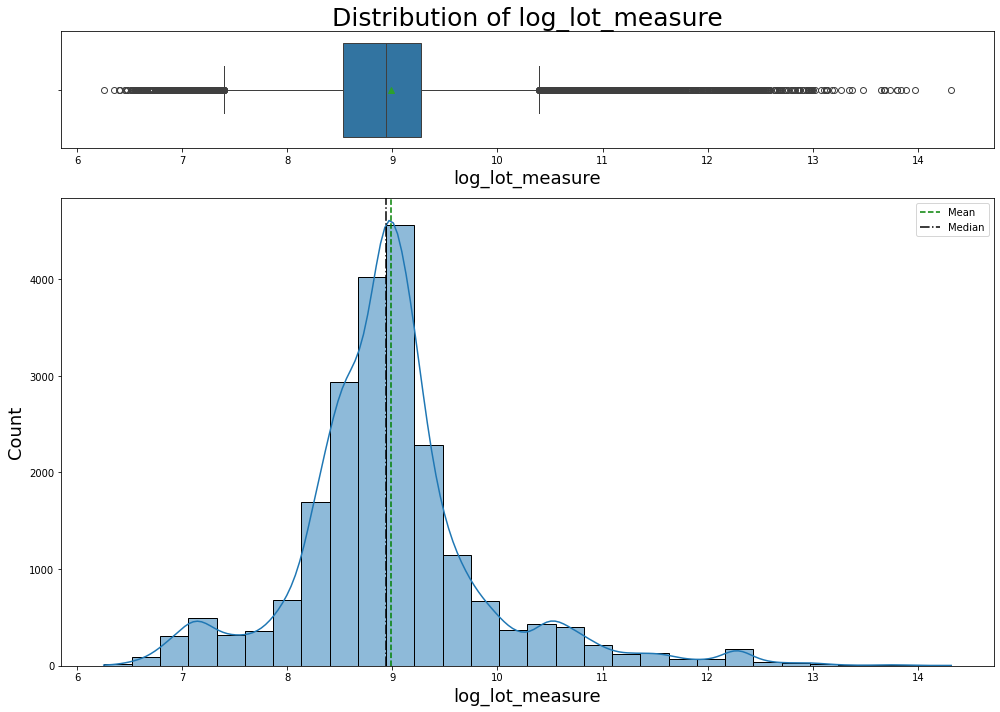

In [54]:
plot_histogram_and_boxplot(df, 'log_lot_measure')

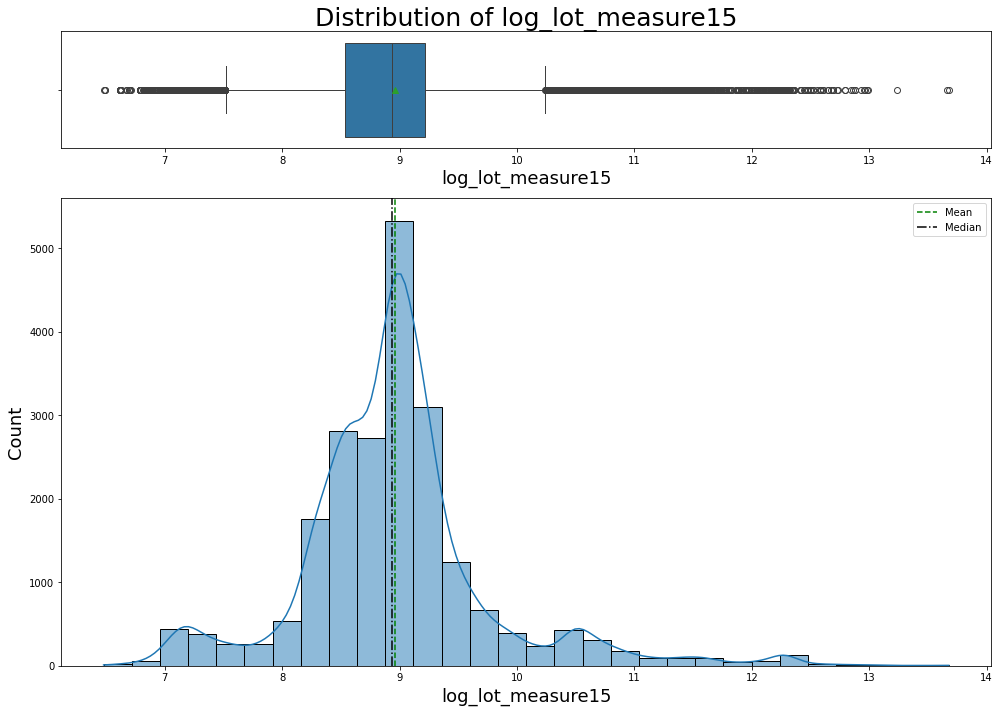

In [55]:
plot_histogram_and_boxplot(df, 'log_lot_measure15')

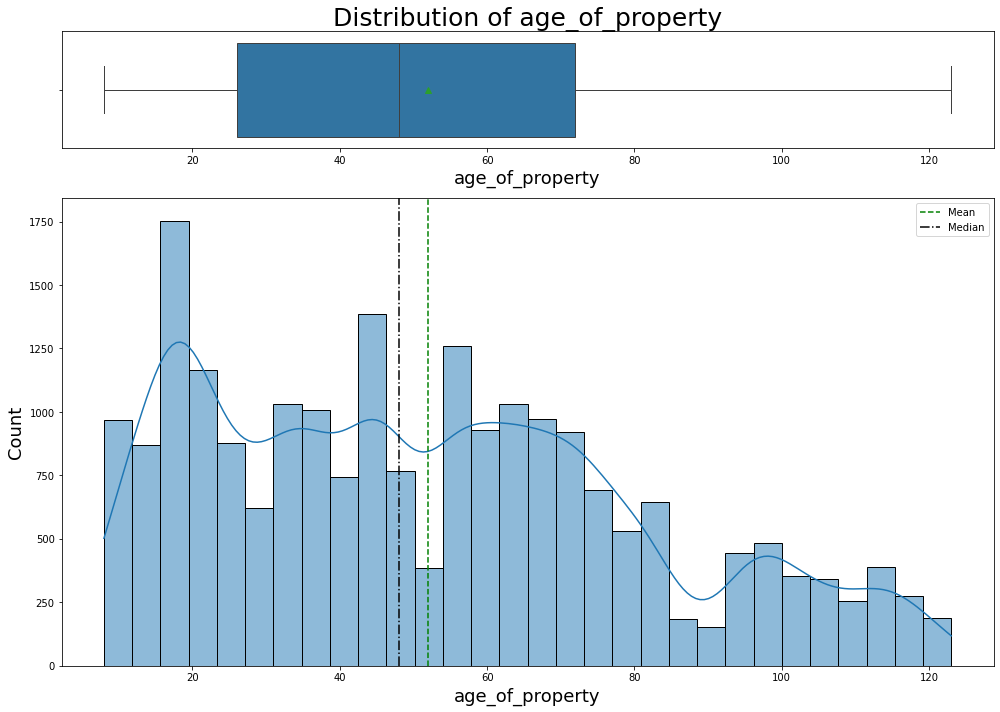

In [56]:
plot_histogram_and_boxplot(df, 'age_of_property')

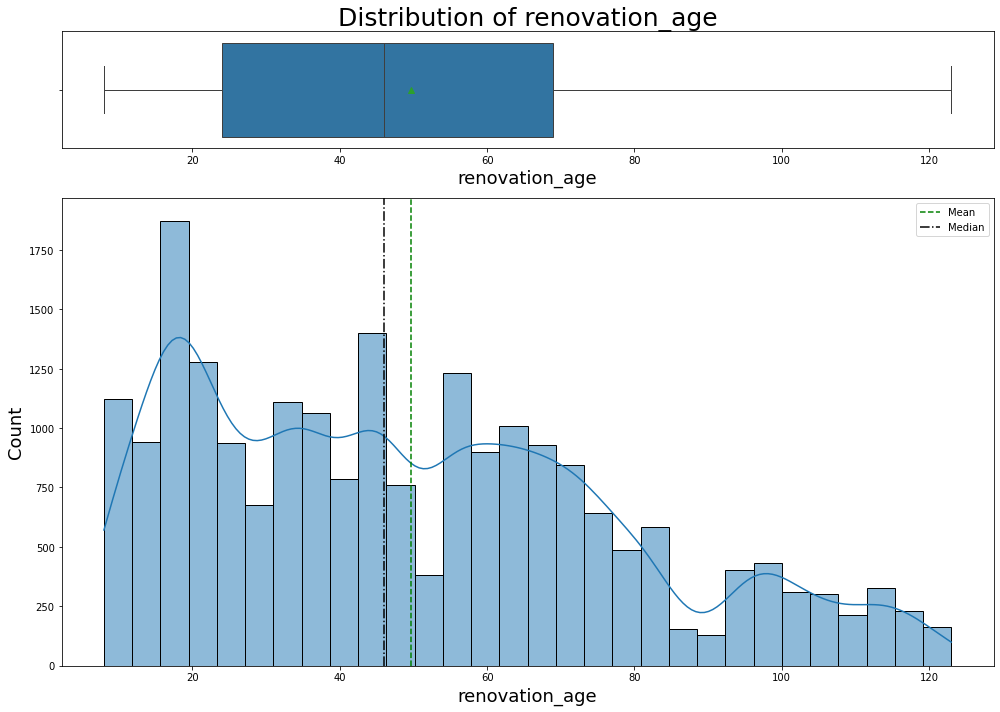

In [57]:
plot_histogram_and_boxplot(df, 'renovation_age')

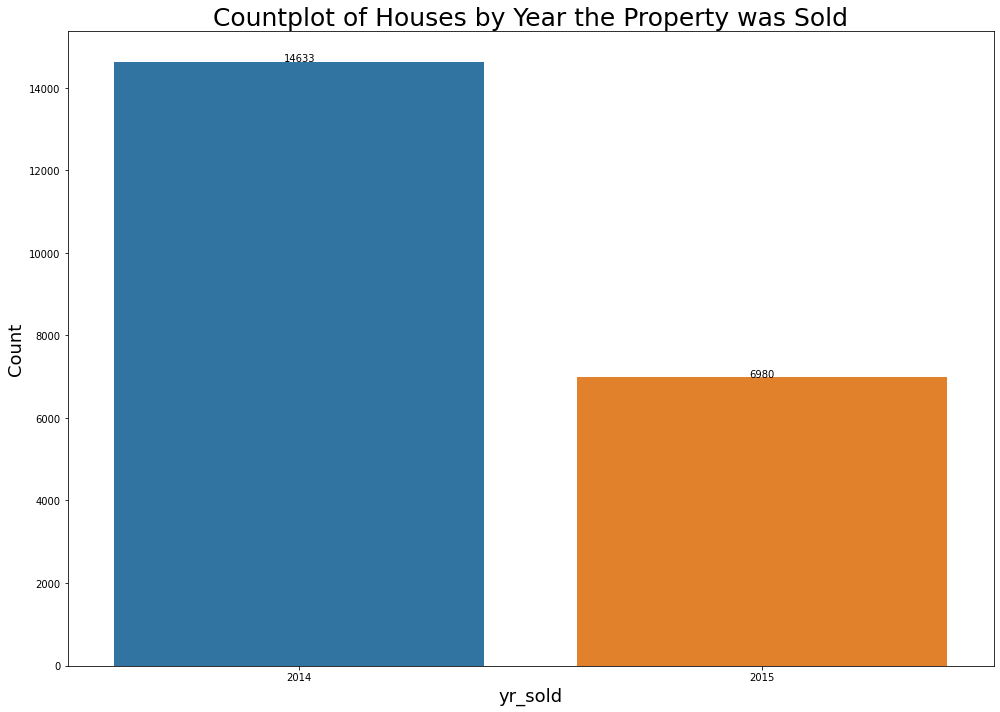

In [58]:
countplot_labeled(df, 'yr_sold', title="Countplot of Houses by Year the Property was Sold")

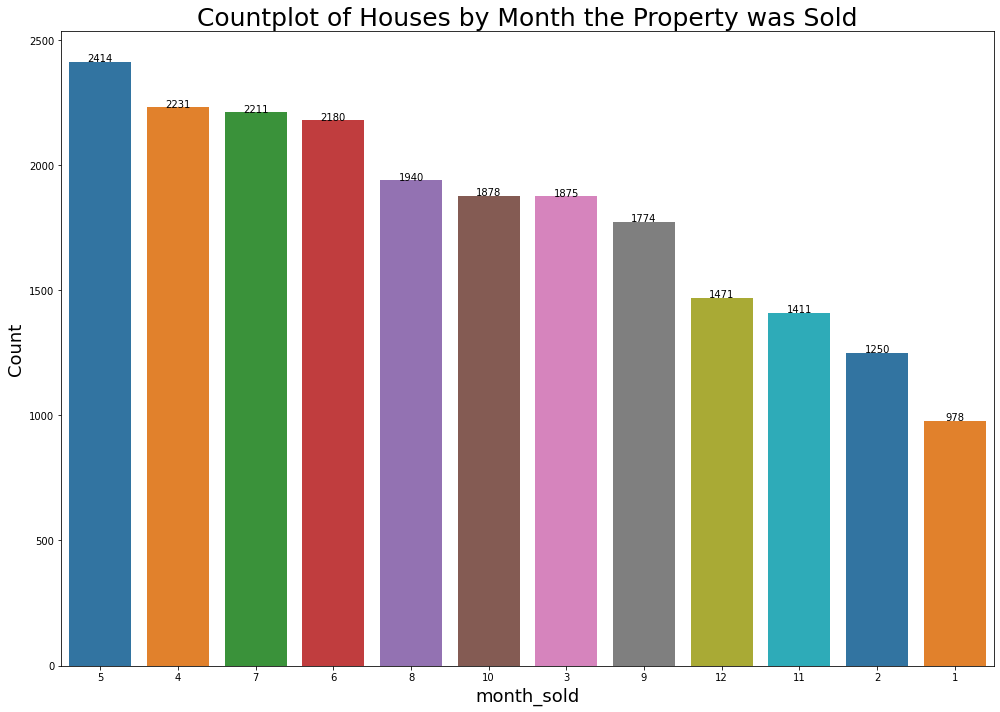

In [59]:
countplot_labeled(df, 'month_sold', title="Countplot of Houses by Month the Property was Sold")

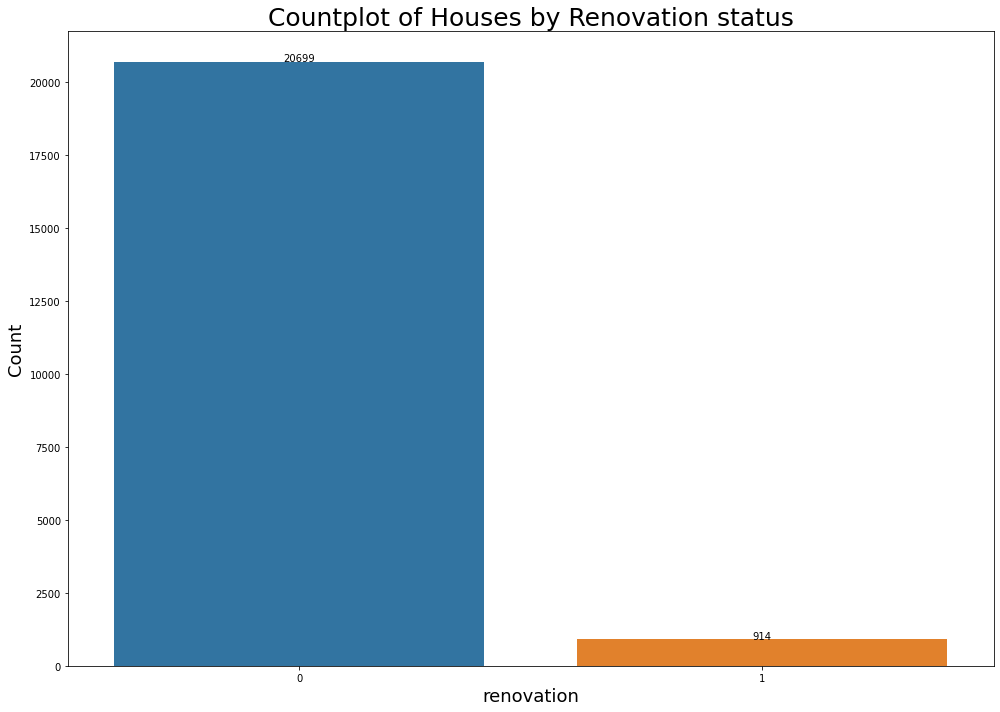

In [60]:
countplot_labeled(df, 'renovation', title="Countplot of Houses by Renovation status")

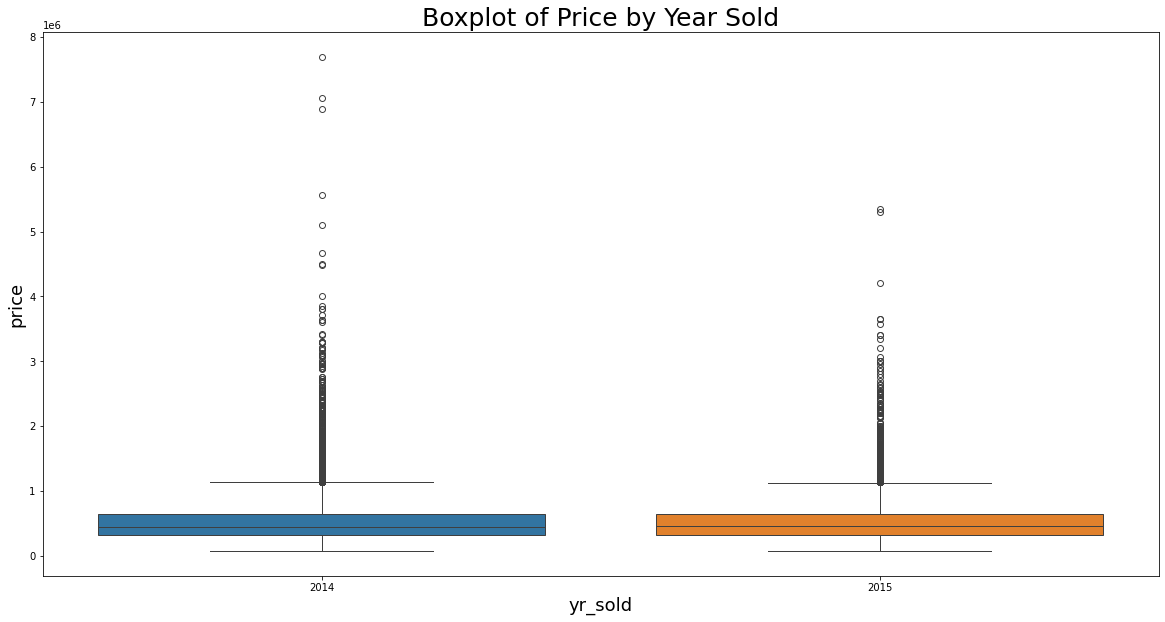

In [61]:
# Boxplot of Price by Year Sold

plt.figure(figsize=(20, 10))
sns.boxplot(x='yr_sold', y='price', data=df.sort_values("yr_sold", ascending=True), palette='tab10')
plt.title('Boxplot of Price by Year Sold', fontsize = 25)
plt.xlabel('yr_sold', fontsize = 18)
plt.ylabel('price', fontsize = 18)
#plt.xticks(rotation=90)
plt.show()

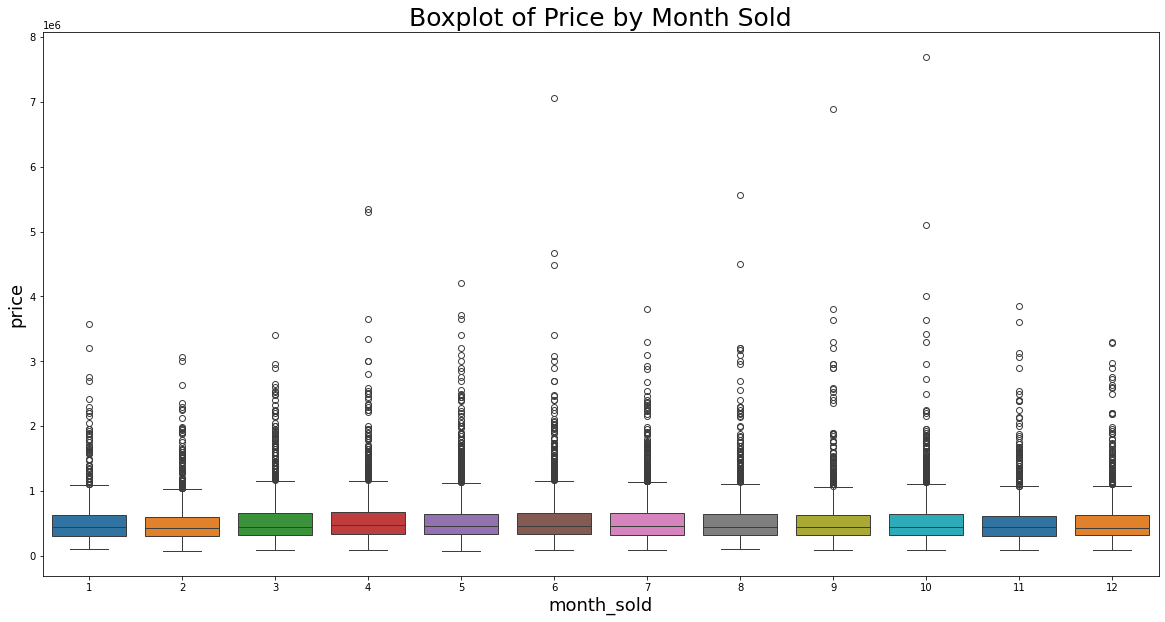

In [62]:
# Boxplot of Price by Month Sold

plt.figure(figsize=(20, 10))
sns.boxplot(x='month_sold', y='price', data=df.sort_values("month_sold", ascending=True), palette='tab10')
plt.title('Boxplot of Price by Month Sold', fontsize = 25)
plt.xlabel('month_sold', fontsize = 18)
plt.ylabel('price', fontsize = 18)
#plt.xticks(rotation=90)
plt.show()

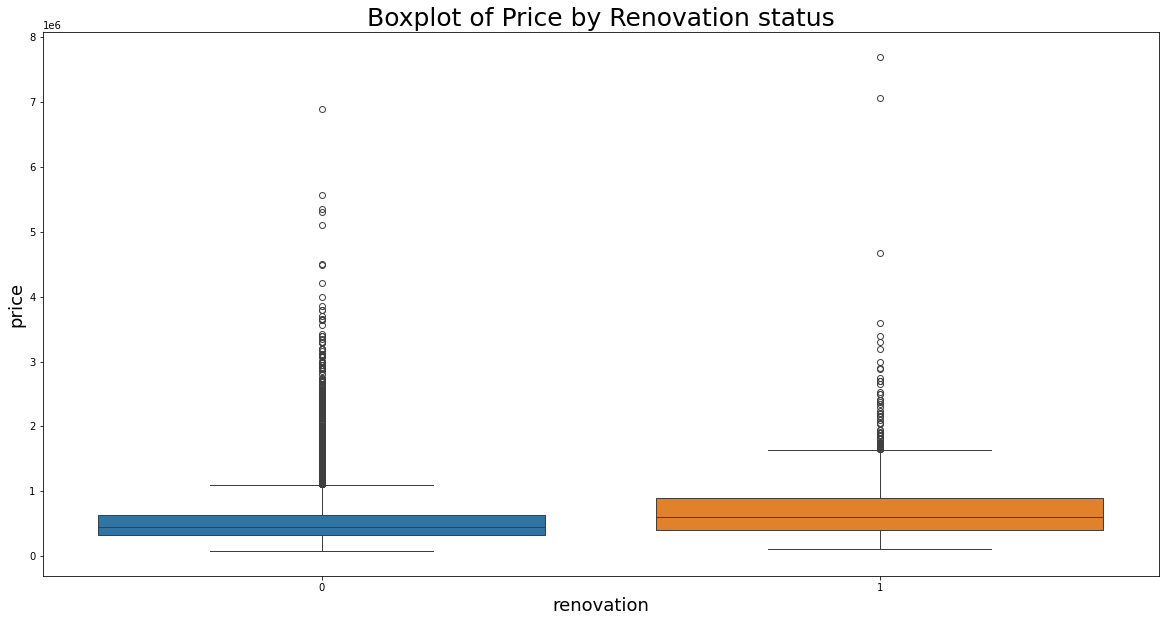

In [63]:
# Boxplot of Price by Renovation status

plt.figure(figsize=(20, 10))
sns.boxplot(x='renovation', y='price', data=df.sort_values("renovation", ascending=True), palette='tab10')
plt.title('Boxplot of Price by Renovation status', fontsize = 25)
plt.xlabel('renovation', fontsize = 18)
plt.ylabel('price', fontsize = 18)
#plt.xticks(rotation=90)
plt.show()

Text(0, 0.5, 'Latitude')

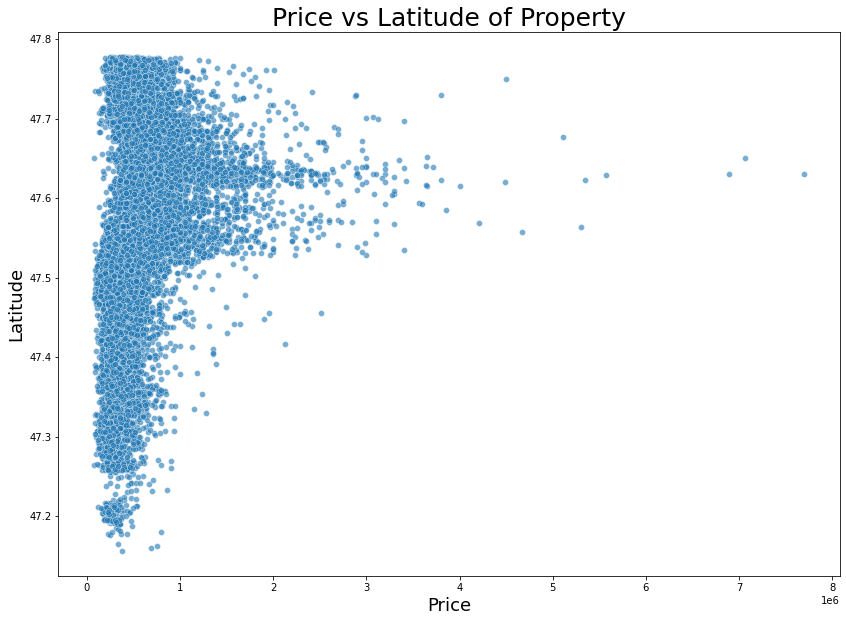

In [150]:
# Set the figure size
plt.figure(figsize=(14, 10))

# Create a scatter plot using Seaborn
sns.scatterplot(x='price', y='lat', data=df, alpha=0.6)

# Set the title
plt.title("Price vs Latitude of Property", fontsize=25)

# Set axis labels
plt.xlabel("Price", fontsize=18)
plt.ylabel("Latitude", fontsize=18)

Text(0, 0.5, 'Longitude')

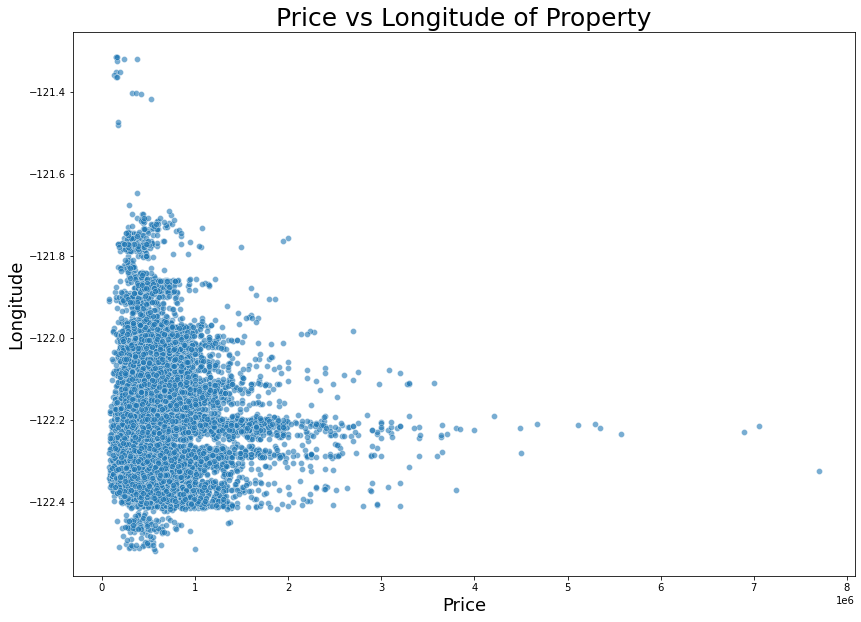

In [149]:
# Set the figure size
plt.figure(figsize=(14, 10))

# Create a scatter plot using Seaborn
sns.scatterplot(x='price', y='long', data=df, alpha=0.6)

# Set the title
plt.title("Price vs Longitude of Property", fontsize=25)

# Set axis labels
plt.xlabel("Price", fontsize=18)
plt.ylabel("Longitude", fontsize=18)

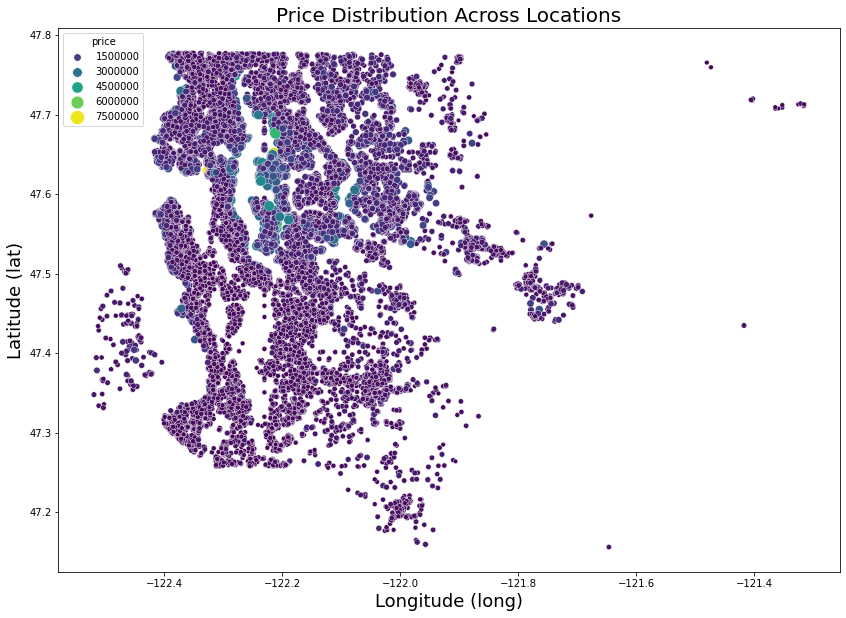

In [66]:
# Create a jointplot
plt.figure(figsize=(14, 10))
sns.scatterplot(x='long', y='lat', data=df, hue='price', palette='viridis', size='price', sizes=(20, 200))

# Set a descriptive title
plt.title("Price Distribution Across Locations", fontsize=20)

# Label the axes with larger fonts
plt.xlabel("Longitude (long)", fontsize=18)
plt.ylabel("Latitude (lat)", fontsize=18)

# Show the plot
plt.show()

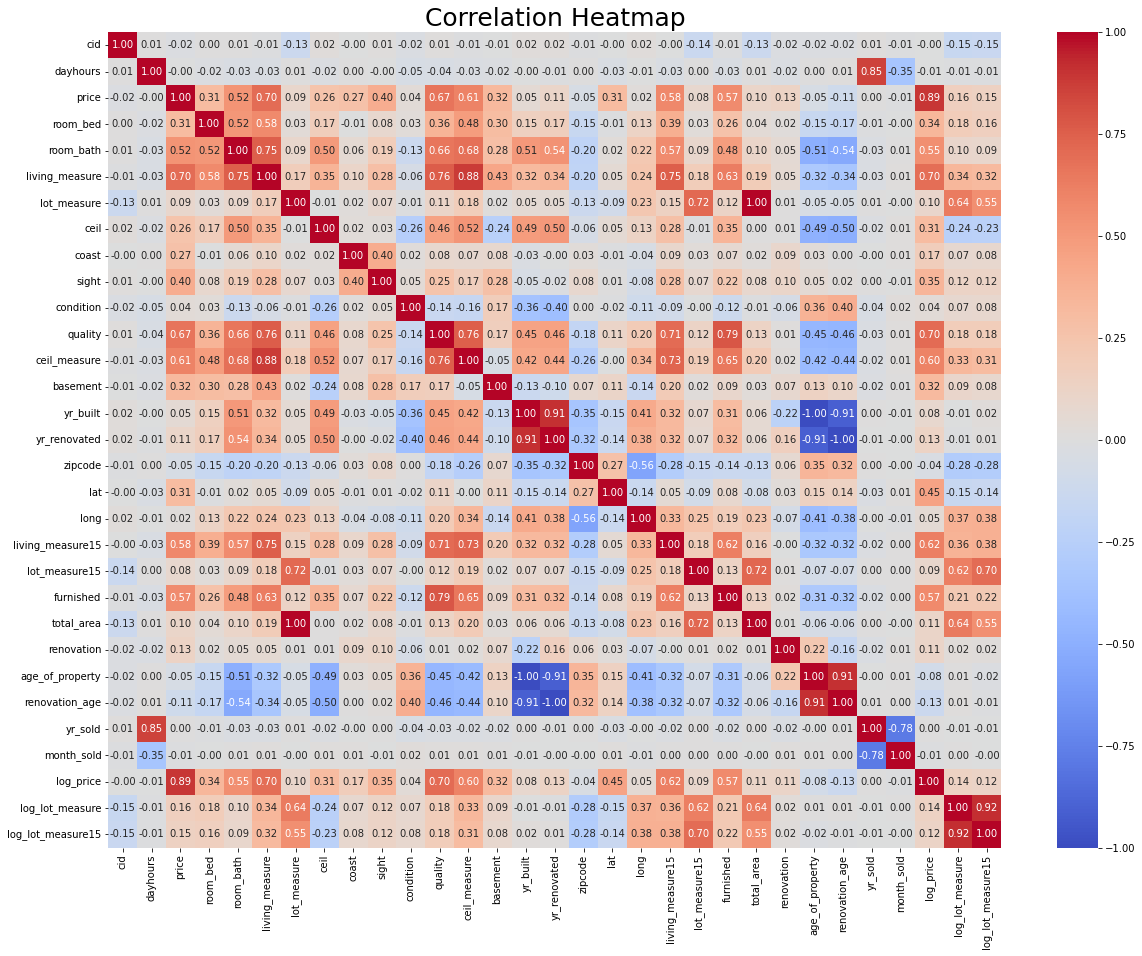

In [67]:
# Getting the correlation matrix
correlation_matrix = df.corr()

# Plotting the Heatmap using correlation matrix
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap', fontsize = 25)
plt.show()

In [68]:
df.head(10).T

0                    1  \
cid                         3876100940           3145600250   
dayhours           2015-04-27 00:00:00  2015-03-17 00:00:00   
price                           600000               190000   
room_bed                           4.0                  2.0   
room_bath                         1.75                  1.0   
living_measure                  3050.0                670.0   
lot_measure                     9440.0               3101.0   
ceil                               1.0                  1.0   
coast                              0.0                  0.0   
sight                              0.0                  0.0   
condition                          3.0                  4.0   
quality                            8.0                  6.0   
ceil_measure                    1800.0                670.0   
basement                        1250.0                  0.0   
yr_built                        1966.0               1948.0   
yr_renovated                    1966.0               1948.0   
zipcode                          98034                98118   
lat                            47.7228              47.5546   
long                          -122.183             -122.274   
living_measure15                2020.0               1660.0   
lot_measure15                   8660.0               4100.0   
furnished                          0.0                  0.0   
total_area                     12490.0               3771.0   
renovation                           0                    0   
age_of_property                   57.0                 75.0   
renovation_age                    57.0                 75.0   
yr_sold                           2015                 2015   
month_sold                           4                    3   
log_price                    13.304685            12.154779   
log_lot_measure               9.152711              8.03948   
log_lot_measure15              9.06647             8.318742   

                                     2                    3  \
cid                         7129303070           7338220280   
dayhours           2014-08-20 00:00:00  2014-10-10 00:00:00   
price                           735000               257000   
room_bed                           4.0                  3.0   
room_bath                         2.75                  2.5   
living_measure                  3040.0               1740.0   
lot_measure                     2415.0               3721.0   
ceil                               2.0                  2.0   
coast                              1.0                  0.0   
sight                              4.0                  0.0   
condition                          3.0                  3.0   
quality                            8.0                  8.0   
ceil_measure                    3040.0               1740.0   
basement                           0.0                  0.0   
yr_built                        1966.0               2009.0   
yr_renovated                    1966.0               2009.0   
zipcode                          98118                98002   
lat                            47.5188              47.3363   
long                          -122.256             -122.213   
living_measure15                2620.0               2030.0   
lot_measure15                   2433.0               3794.0   
furnished                          0.0                  0.0   
total_area                      5455.0               5461.0   
renovation                           0                    0   
age_of_property                   57.0                 14.0   
renovation_age                    57.0                 14.0   
yr_sold                           2014                 2014   
month_sold                           8                   10   
log_price                    13.507626            12.456831   
log_lot_measure               7.789455             8.221748   
log_lot_measure15              7.79688             8.241176   

   

In [69]:
zipcode_groups = {
    range(98001, 98011): 'Location1',
    range(98011, 98021): 'Location2',
    range(98021, 98031): 'Location3',
    range(98031, 98041): 'Location4',
    range(98041, 98051): 'Location5',
    range(98051, 98061): 'Location6',
    range(98061, 98071): 'Location7',
    range(98071, 98081): 'Location8',
    range(98081, 98091): 'Location9',
    range(98091, 98101): 'Location10',
    range(98101, 98111): 'Location11',
    range(98111, 98121): 'Location12',
    range(98121, 98131): 'Location13',
    range(98131, 98141): 'Location14',
    range(98141, 98151): 'Location15',
    range(98151, 98161): 'Location16',
    range(98161, 98171): 'Location17',
    range(98171, 98181): 'Location18',
    range(98181, 98191): 'Location19',
    range(98191, 98201): 'Location20',
}

# Function to map zip codes to group names
def map_zipcode_to_group(zipcode):
    for zipcode_range, group_name in zipcode_groups.items():
        if int(zipcode) in zipcode_range:
            return group_name
    return 'Other'

# Create a new column 'location' based on the mapping
df['location'] = df['zipcode'].apply(map_zipcode_to_group)


In [70]:
df.nunique(axis = 0)

cid                  21436
dayhours               372
price                 3625
room_bed                13
room_bath               30
living_measure        1038
lot_measure           9765
ceil                     6
coast                    2
sight                    5
condition                5
quality                 12
ceil_measure           946
basement               306
yr_built               116
yr_renovated           116
zipcode                 70
lat                   5034
long                   752
living_measure15       774
lot_measure15         8682
furnished                2
total_area           11144
renovation               2
age_of_property        116
renovation_age         116
yr_sold                  2
month_sold              12
log_price             3625
log_lot_measure       9765
log_lot_measure15     8682
location                19
dtype: int64

### Feature Selection

In [71]:
selected_df = df[
    ['room_bed', 'room_bath', 'living_measure', 'ceil', 'coast', 'sight',
     'condition', 'quality', 'ceil_measure', 'basement',
     'living_measure15', 'furnished', 'total_area', 'renovation',
     'age_of_property', 'renovation_age', 'log_price', 'log_lot_measure15', 'location']
]

In [72]:
selected_df.head()

room_bed  room_bath  living_measure  ceil coast  sight  condition  quality  \
0       4.0       1.75          3050.0   1.0   0.0    0.0        3.0      8.0   
1       2.0       1.00           670.0   1.0   0.0    0.0        4.0      6.0   
2       4.0       2.75          3040.0   2.0   1.0    4.0        3.0      8.0   
3       3.0       2.50          1740.0   2.0   0.0    0.0        3.0      8.0   
4       2.0       1.00          1120.0   1.0   0.0    0.0        3.0      7.0   

   ceil_measure  basement  living_measure15 furnished  total_area renovation  \
0        1800.0    1250.0            2020.0       0.0     12490.0          0   
1         670.0       0.0            1660.0       0.0      3771.0          0   
2        3040.0       0.0            2620.0       0.0      5455.0          0   
3        1740.0       0.0            2030.0       0.0      5461.0          0   
4        1120.0       0.0            1120.0       0.0      5710.0          0   

   age_of_property  renovation_age  log_price  log_lot_measure15    location  
0             57.0            57.0  13.304685           9.066470   Location4  
1             75.0            75.0  12.154779           8.318742  Location12  
2             57.0            57.0  13.507626           7.796880  Location12  
3             14.0            14.0  12.456831           8.241176   Location1  
4             99.0            99.0  13.017003           8.536996  Location12

In [73]:
selected_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   room_bed           21613 non-null  float64 
 1   room_bath          21613 non-null  float64 
 2   living_measure     21613 non-null  float64 
 3   ceil               21613 non-null  float64 
 4   coast              21613 non-null  category
 5   sight              21613 non-null  float64 
 6   condition          21613 non-null  float64 
 7   quality            21613 non-null  float64 
 8   ceil_measure       21613 non-null  float64 
 9   basement           21613 non-null  float64 
 10  living_measure15   21613 non-null  float64 
 11  furnished          21613 non-null  category
 12  total_area         21613 non-null  float64 
 13  renovation         21613 non-null  category
 14  age_of_property    21613 non-null  float64 
 15  renovation_age     21613 non-null  float64 
 16  log_

In [74]:
# defining Independent (X) and target (y) variables
X = selected_df.drop("log_price", axis=1)
y = selected_df["log_price"]

print(X.shape)
display(X.head())
display(y.head())

(21613, 18)


room_bed  room_bath  living_measure  ceil coast  sight  condition  quality  \
0       4.0       1.75          3050.0   1.0   0.0    0.0        3.0      8.0   
1       2.0       1.00           670.0   1.0   0.0    0.0        4.0      6.0   
2       4.0       2.75          3040.0   2.0   1.0    4.0        3.0      8.0   
3       3.0       2.50          1740.0   2.0   0.0    0.0        3.0      8.0   
4       2.0       1.00          1120.0   1.0   0.0    0.0        3.0      7.0   

   ceil_measure  basement  living_measure15 furnished  total_area renovation  \
0        1800.0    1250.0            2020.0       0.0     12490.0          0   
1         670.0       0.0            1660.0       0.0      3771.0          0   
2        3040.0       0.0            2620.0       0.0      5455.0          0   
3        1740.0       0.0            2030.0       0.0      5461.0          0   
4        1120.0       0.0            1120.0       0.0      5710.0          0   

   age_of_property  renovation_age  log_lot_measure15    location  
0             57.0            57.0           9.066470   Location4  
1             75.0            75.0           8.318742  Location12  
2             57.0            57.0           7.796880  Location12  
3             14.0            14.0           8.241176   Location1  
4             99.0            99.0           8.536996  Location12

0    13.304685
1    12.154779
2    13.507626
3    12.456831
4    13.017003
Name: log_price, dtype: float64

In [75]:
# One hot encoding of categorical variables

X = pd.get_dummies(X, columns=X.select_dtypes(include=["object","category"]).columns.to_list(), drop_first=True)
print(X.shape)
display(X.head().T)

(21613, 35)


0         1        2         3         4
room_bed                 4.0       2.0      4.0       3.0       2.0
room_bath               1.75       1.0     2.75       2.5       1.0
living_measure        3050.0     670.0   3040.0    1740.0    1120.0
ceil                     1.0       1.0      2.0       2.0       1.0
sight                    0.0       0.0      4.0       0.0       0.0
condition                3.0       4.0      3.0       3.0       3.0
quality                  8.0       6.0      8.0       8.0       7.0
ceil_measure          1800.0     670.0   3040.0    1740.0    1120.0
basement              1250.0       0.0      0.0       0.0       0.0
living_measure15      2020.0    1660.0   2620.0    2030.0    1120.0
total_area           12490.0    3771.0   5455.0    5461.0    5710.0
age_of_property         57.0      75.0     57.0      14.0      99.0
renovation_age          57.0      75.0     57.0      14.0      99.0
log_lot_measure15    9.06647  8.318742  7.79688  8.241176  8.536996
coast_1.0              False     False     True     False     False
furnished_1.0          False     False    False     False     False
renovation_1           False     False    False     False     False
location_Location10    False     False    False     False     False
location_Location11    False     False    False     False     False
location_Location12    False      True     True     False      True
location_Location13    False     False    False     False     False
location_Location14    False     False    False     False     False
location_Location15    False     False    False     False     False
location_Location16    False     False    False     False     False
location_Location17    False     False    False     False     False
location_Location18    False     False    False     False     False
location_Location19    False     False    False     False     False
location_Location2     False     False    False     False     False
location_Location20    False     False    False     False     False
location_Location3     False     False    False     False     False
location_Location4      True     False    False     False     False
location_Location5     False     False    False     False     False
location_Location6     False     False    False     False     False
location_Location7     False     False    False     False     False
location_Location8     False     False    False     False     False

In [76]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   room_bed             21613 non-null  float64
 1   room_bath            21613 non-null  float64
 2   living_measure       21613 non-null  float64
 3   ceil                 21613 non-null  float64
 4   sight                21613 non-null  float64
 5   condition            21613 non-null  float64
 6   quality              21613 non-null  float64
 7   ceil_measure         21613 non-null  float64
 8   basement             21613 non-null  float64
 9   living_measure15     21613 non-null  float64
 10  total_area           21613 non-null  float64
 11  age_of_property      21613 non-null  float64
 12  renovation_age       21613 non-null  float64
 13  log_lot_measure15    21613 non-null  float64
 14  coast_1.0            21613 non-null  bool   
 15  furnished_1.0        21613 non-null 

In [77]:
# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [78]:
# Scaling the data to bring it to the same scale 

# Create a StandardScaler instance
scaler = StandardScaler()

# Create a copy of the data
X_train_scaled = X_train.copy()  
X_test_scaled = X_test.copy()

numeric_columns = X_train.select_dtypes(include = np.number).columns.to_list()

# Standardize the numerical columns
X_train_scaled[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test_scaled[numeric_columns] = scaler.transform(X_test[numeric_columns])

In [79]:
# Select boolean columns
bool_columns = X_train_scaled.select_dtypes(include='bool')

# Convert boolean columns to integers (0 for False, 1 for True)
X_train_scaled[bool_columns.columns] = bool_columns.astype(int)

bool_columns = X_test_scaled.select_dtypes(include='bool')

# Convert boolean columns to integers (0 for False, 1 for True)
X_test_scaled[bool_columns.columns] = bool_columns.astype(int)

In [80]:
X_train_scaled

room_bed  room_bath  living_measure      ceil     sight  condition  \
167   -0.395173   0.174075        0.128040  0.937978 -0.305138  -0.628038   
12412 -1.466219  -0.479824       -0.481594 -0.919197 -0.305138   0.907945   
7691  -0.395173   0.501024        0.759447  0.937978  2.303754  -0.628038   
12460 -0.395173  -0.152875       -0.514253 -0.919197 -0.305138   0.907945   
9099  -0.395173  -0.152875       -0.644889 -0.919197 -0.305138  -0.628038   
...         ...        ...             ...       ...       ...        ...   
11964 -0.395173   0.501024        0.215130  0.937978 -0.305138  -0.628038   
21575 -0.395173  -1.460671       -0.503367 -0.919197 -0.305138   0.907945   
5390  -0.395173   0.501024        0.411084 -0.919197 -0.305138   0.907945   
860    0.675872  -1.460671       -0.459822 -0.919197 -0.305138  -3.700005   
15795 -0.395173   0.501024        0.236903  0.937978  2.303754  -0.628038   

        quality  ceil_measure  basement  living_measure15  ...  \
167    0.289924      0.493792 -0.657992          0.311572  ...   
12412 -0.560786     -0.906663  0.695650         -0.773832  ...   
7691   1.140635      1.194020 -0.657992          0.942280  ...   
12460 -0.560786     -0.942882  0.695650         -1.389873  ...   
9099  -0.560786     -0.363383 -0.657992         -0.583153  ...   
...         ...           ...       ...               ...  ...   
11964  0.289924      0.107460  0.244436          0.428913  ...   
21575 -1.411497     -0.206436 -0.657992         -0.451145  ...   
5390   1.140635      0.083314  0.695650          1.294303  ...   
860   -2.262208     -1.039465  0.988939         -0.216463  ...   
15795  0.289924      0.614521 -0.657992          0.956948  ...   

       location_Location18  location_Location19  location_Location2  \
167                      0                    0                   0   
12412                    0                    0                   0   
7691                     0                    0                   0   
12460                    0                    0                   0   
9099                     0                    0                   0   
...                    ...                  ...                 ...   
11964                    0                    0                   0   
21575                    0                    0                   0   
5390                     0                    0                   0   
860                      0                    0                   0   
15795                    0                    0                   0   

       location_Location20  location_Location3  location_Location4  \
167                      0                   0                   0   
12412                    0                   0                   0   
7691                     0                   0                   0   
12460                    0                   0                   0   
9099                     0                   0                   0   
...                    ...                 ...                 ...   
11964                    0                   1                   0   
21575                    0                   0                   0   
5390                     0                   1                   0   
860                      0                   0                   0   
15795                    0                   0                   0   

       location_Location5  location_Location6  location_Location7  \
167                     0                   0                   0   
12412                   0                   0                   0   
7691                    0                   0                   0   
12460                   0                   0                   0   
9099                    0                   0                   0   
...                   ...                 ...                 ...   
11964                   0                   0                   0   
21575                   0                  

# Linear Regression Model

### Linear Regression using Sklearn

In [81]:
# fitting the model on the train data

linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)

LinearRegression()

#### Checking the coefficients and intercept of the model

In [82]:
coef_df = pd.DataFrame(np.append(linear_reg.coef_, linear_reg.intercept_), \
                       index = X_train.columns.to_list() + ["Intercept"], columns = ["Coefficients"])
coef_df

Coefficients
room_bed                -0.005094
room_bath                0.038037
living_measure          -0.024147
ceil                     0.011263
sight                    0.027345
condition                0.040575
quality                  0.204815
ceil_measure             0.145259
basement                 0.078518
living_measure15         0.104511
total_area               0.024845
age_of_property          0.056137
renovation_age           0.025714
log_lot_measure15       -0.021933
coast_1.0                0.425086
furnished_1.0           -0.004043
renovation_1             0.124244
location_Location10     -0.372867
location_Location11      0.214766
location_Location12      0.260463
location_Location13      0.158110
location_Location14      0.090518
location_Location15      0.022519
location_Location16      0.014122
location_Location17     -0.221787
location_Location18     -0.085775
location_Location19     -0.306767
location_Location2      -0.023404
location_Location20      0.004417
location_Location3      -0.157654
location_Location4       0.011104
location_Location5      -0.247882
location_Location6      -0.047989
location_Location7      -0.032898
location_Location8       0.021455
Intercept               13.026158

---

## Model Performance Check

In [83]:
# Function to compute adjusted R-squared
def adjusted_r2_score(predictors, targets, predictions):
    """
    Compute the adjusted R-squared score.

    Parameters:
    predictors (array-like): Independent variables.
    targets (array-like): Dependent variable.
    predictions (array-like): Predicted values.

    Returns:
    float: Adjusted R-squared score.
    """
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# Function to compute MAPE score
def mape_score(targets, predictions):
    """
    Compute the Mean Absolute Percentage Error (MAPE).

    Parameters:
    targets (array-like): Actual target values.
    predictions (array-like): Predicted values.

    Returns:
    float: MAPE score.
    """
    return np.mean(np.abs(targets - predictions) / targets) * 100

# Function to check performance of a regression model by computing different metrics
def model_performance_regression(model, predictors, target):
    """
    Compute various regression metrics to assess model performance.

    Parameters:
    model: Regression model (e.g., from Scikit-Learn).
    predictors (array-like): Independent variables.
    target (array-like): Dependent variable.

    Returns:
    dict: Dictionary containing RMSE, MAE, R-squared, adjusted R-squared, and MAPE.
    """
    # Predict using the independent variables
    predictions = model.predict(predictors)

    # Calculate various metrics
    rmse = np.sqrt(mean_squared_error(target, predictions))
    mae = mean_absolute_error(target, predictions)
    r2 = r2_score(target, predictions)
    adj_r2 = adjusted_r2_score(predictors, target, predictions)
    mape = mape_score(target, predictions)

    # Create a DataFrame of metrics
    metrics_df = pd.DataFrame(
        {
            "RMSE": [rmse],
            "MAE": [mae],
            "R-squared": [r2],
            "Adj. R-squared": [adj_r2],
            "MAPE": [mape],
        }
    )

    return metrics_df

In [84]:
# Checking model performance on training set
linear_reg_train_performance = model_performance_regression(linear_reg, X_train_scaled, y_train)
print("Training Performance")
linear_reg_train_performance

Training Performance


RMSE      MAE  R-squared  Adj. R-squared      MAPE
0  0.283641  0.22243   0.711224        0.710554  1.709922

In [85]:
# Checking model performance on test set
linear_reg_test_performance = model_performance_regression(linear_reg, X_test_scaled, y_test)
print("Test Performance")
linear_reg_test_performance

Test Performance


RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.278319  0.218105    0.71832        0.716791  1.676499

#### **Observations:**

1. The model is not underfitting as the training $R^2$ is 0.711, indicating that the model explains approximately 71% of the variation in the train data.
2. The model is not overfitting as **MAE (0.2224, 0.2181)** and **RMSE (0.2836, 0.2783)** on the train and test sets are comparable.
3. Adjusted-$R^2$ and $R^2$ are comparable for training asa well as testing stage.
4. MAE indicates that our current model is able to predict log_price within a mean error of **0.2181** on the test data
5. MAPE on the test set suggests that on average, the model's predictions for log_price are off by approximately **1.68%** in percentage terms.

### Linear Regression using statsmodels

In [86]:
# Statsmodels does not add a constant to the data on its own
# We have to add the constant manually
X_train1 = sm.add_constant(X_train_scaled)
X_test1 = sm.add_constant(X_test_scaled)

olsmodel0 = sm.OLS(y_train, X_train1).fit()
print(olsmodel0.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     1062.
Date:                Fri, 27 Oct 2023   Prob (F-statistic):               0.00
Time:                        23:24:40   Log-Likelihood:                -2403.9
No. Observations:               15129   AIC:                             4880.
Df Residuals:                   15093   BIC:                             5154.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  13.0262    

#### **Observations:**

1. When a coefficient has a negative value, it implies that an increase in the corresponding attribute value is associated with a decrease in the normalized used price.
2. Conversely, when a coefficient has a positive value, it indicates that an increase in the corresponding attribute value is linked to an increase in the normalized used price.
3. The p-value of a variable serves as an indicator of its significance. Assuming a significance level of 0.05 (5%), any variable with a p-value less than 0.05 is considered statistically significant. In other words, if the p-value is below 0.05, we have evidence to suggest that the variable has a meaningful impact on the outcome.
4. However, it's important to note that these variables may exhibit multicollinearity, which can distort p-values. To address multicollinearity and ensure the validity of linear regression assumptions, it is necessary to assess other regression assumptions before solely relying on p-values.
---

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

### Test For Multicollinearity

#### Variance  Inflation Factor (VIF):
Variance inflation factors (VIF) quantify the inflation in the variances of regression parameter estimates due to collinearity among predictors. VIF values help assess the impact of multicollinearity, or high correlation among predictors, in a regression model.
1. When VIF is in the range of 1 to 5, it indicates low multicollinearity, suggesting relatively independent predictors.
2. VIF values between 5 and 10 signify moderate multicollinearity, where some correlations exist among predictors but are not highly problematic.
3. VIF exceeding 10 shows signs of high multicollinearity, which can complicate interpretation and reliability of regression results.

In [87]:
# Function to calculate VIF
def calculate_vif(predictors):
    """
    Calculate Variance Inflation Factors (VIF) to assess multicollinearity among predictors.

    Parameters:
    predictors (DataFrame): DataFrame containing predictor variables.

    Returns:
    DataFrame: A DataFrame with columns 'feature' (predictor names) and 'VIF' (VIF values).
    """
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # Calculate VIF for each feature
    vif["VIF"] = [variance_inflation_factor(predictors.values, i) for i in range(len(predictors.columns))]
    
    return vif

In [88]:
calculate_vif(X_train1)

feature          VIF
0                 const    10.774254
1              room_bed     1.619994
2             room_bath     3.392962
3        living_measure  1101.836039
4                  ceil     2.432814
5                 sight     1.465723
6             condition     1.285466
7               quality     4.842238
8          ceil_measure   896.741499
9              basement   257.009992
10     living_measure15     3.142041
11           total_area     1.640455
12      age_of_property    35.457231
13       renovation_age    34.876148
14    log_lot_measure15     2.673773
15            coast_1.0     1.230551
16        furnished_1.0     2.799606
17         renovation_1     6.325715
18  location_Location10     1.154215
19  location_Location11     2.144158
20  location_Location12     2.306461
21  location_Location13     1.548172
22  location_Location14     1.368766
23  location_Location15     1.369417
24  location_Location16     1.174822
25  location_Location17     1.235042
26  location_Location18     1.235169
27  location_Location19     1.058755
28   location_Location2     1.231015
29  location_Location20     1.277585
30   location_Location3     1.739534
31   location_Location4     1.789854
32   location_Location5     1.308773
33   location_Location6     1.896590
34   location_Location7     1.208134
35   location_Location8     1.523349

#### **Observations:**
- The following attributes have VIF score greater than 5:
    - living_measure
    - ceil_measure
    - basement
    - age_of_property
    - renovation_age
    - renovation_1

### Removing Multicollinearity

To remove multicollinearity

1. Drop every column one by one that has a VIF score greater than 5
2. Look at the adjusted R-squared and RMSE of all these models
3. Drop the variable that makes the least change in adjusted R-squared
4. Check the VIF scores again
5. Continue till you get all VIF scores under 5

In [89]:
def evaluate_vif_removal(predictors, target, high_vif_columns):
    """
    Evaluate the effect of dropping columns with high multicollinearity on model performance.

    Parameters:
    predictors (DataFrame): Independent variables.
    target (Series): Dependent variable.
    high_vif_columns (list): Columns with high VIF to be evaluated.

    Returns:
    DataFrame: Results of adjusted R-squared and RMSE after dropping each high VIF column.
    """
    adj_r2 = []  # List to store adjusted R-squared values
    rmse = []    # List to store RMSE values

    for col_to_drop in high_vif_columns:
        # Create a new set of predictors by dropping the column
        predictors_without_col = predictors.drop(columns=[col_to_drop])

        # Fit the OLS model with the modified set of predictors
        ols_model = sm.OLS(target, sm.add_constant(predictors_without_col)).fit()

        # Calculate adjusted R-squared and RMSE
        adj_r2.append(ols_model.rsquared_adj)
        rmse.append(np.sqrt(ols_model.mse_resid))

    # Create a DataFrame to store the results
    results_df = pd.DataFrame({
        "Column_Dropped": high_vif_columns,
        "Adj_R2_After_Drop": adj_r2,
        "RMSE_After_Drop": rmse
    })

    # Sort the results by adjusted R-squared in descending order
    results_df = results_df.sort_values(by="Adj_R2_After_Drop", ascending=False).reset_index(drop=True)

    return results_df

In [90]:
column_list = ["living_measure", "ceil_measure", "basement", "age_of_property", "renovation_age", "renovation_1"]

result = evaluate_vif_removal(X_train1, y_train, column_list)
result

Column_Dropped  Adj_R2_After_Drop  RMSE_After_Drop
0   living_measure           0.710571         0.283971
1   renovation_age           0.710505         0.284003
2     ceil_measure           0.710489         0.284011
3         basement           0.710487         0.284012
4  age_of_property           0.710254         0.284126
5     renovation_1           0.710209         0.284148

#### **Observations:**
1. We will drop living_measure and check VIF again.

In [91]:
col_to_drop = "living_measure"
X_train2 = X_train1.loc[:, ~X_train1.columns.str.startswith(col_to_drop)]
X_test2 = X_test1.loc[:, ~X_test1.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = calculate_vif(X_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  living_measure


feature        VIF
0                 const  10.752030
1              room_bed   1.618915
2             room_bath   3.389782
3                  ceil   2.432044
4                 sight   1.432607
5             condition   1.280650
6               quality   4.618773
7          ceil_measure   4.617320
8              basement   1.923532
9            total_area   1.617264
10      age_of_property  35.445927
11       renovation_age  34.835704
12    log_lot_measure15   2.616246
13            coast_1.0   1.227023
14        furnished_1.0   2.788605
15         renovation_1   6.325222
16  location_Location10   1.153929
17  location_Location11   2.121015
18  location_Location12   2.280157
19  location_Location13   1.529923
20  location_Location14   1.357769
21  location_Location15   1.360613
22  location_Location16   1.170112
23  location_Location17   1.226558
24  location_Location18   1.232649
25  location_Location19   1.055364
26   location_Location2   1.230946
27  location_Location20   1.273110
28   location_Location3   1.739230
29   location_Location4   1.789832
30   location_Location5   1.307800
31   location_Location6   1.895208
32   location_Location7   1.206990
33   location_Location8   1.514800

#### **Observations:**
- age_of_property, renovation_age and renovation_1 have VIF score greater than 5.

In [92]:
column_list = ["age_of_property", "renovation_age", "renovation_1"]

result = evaluate_vif_removal(X_train2, y_train, column_list)
result

Column_Dropped  Adj_R2_After_Drop  RMSE_After_Drop
0   renovation_age            0.69797         0.290087
1  age_of_property            0.69784         0.290149
2     renovation_1            0.69774         0.290197

#### **Observations:**
1. We will drop renovation_age and check VIF again.

In [93]:
col_to_drop = "renovation_age"
X_train3 = X_train2.loc[:, ~X_train2.columns.str.startswith(col_to_drop)]
X_test3 = X_test2.loc[:, ~X_test2.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = calculate_vif(X_train3)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  renovation_age


feature        VIF
0                 const  10.527148
1              room_bed   1.618886
2             room_bath   3.375030
3                  ceil   2.425493
4                 sight   1.431625
5             condition   1.272117
6               quality   4.612960
7          ceil_measure   4.608298
8              basement   1.923348
9            total_area   1.616911
10      age_of_property   2.746097
11    log_lot_measure15   2.609858
12            coast_1.0   1.223661
13        furnished_1.0   2.788552
14         renovation_1   1.159343
15  location_Location10   1.153801
16  location_Location11   2.119730
17  location_Location12   2.279751
18  location_Location13   1.529923
19  location_Location14   1.357447
20  location_Location15   1.360550
21  location_Location16   1.169988
22  location_Location17   1.226205
23  location_Location18   1.232370
24  location_Location19   1.055342
25   location_Location2   1.230662
26  location_Location20   1.272651
27   location_Location3   1.738449
28   location_Location4   1.789813
29   location_Location5   1.307466
30   location_Location6   1.894942
31   location_Location7   1.206652
32   location_Location8   1.514702

#### **Observations:**
1. No column have VIF > 5.
2. The above predictors have minimum to no multicollinearity

**The assumption is satisfied.**

Let's check the model performance

In [94]:
olsmodel1 = sm.OLS(y_train, X_train3).fit()
print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     1093.
Date:                Fri, 27 Oct 2023   Prob (F-statistic):               0.00
Time:                        23:24:44   Log-Likelihood:                -2727.3
No. Observations:               15129   AIC:                             5521.
Df Residuals:                   15096   BIC:                             5772.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  13.0377    

#### **Observations:**
1. The adjusted-$R^2$ for the training set remained approximately the same at **0.699** even after dropping the columns "living_measure" and "renovation_age". This suggests that the removal of these column had minimal impact on the model's performance, indicating the absence of significant multicollinearity.
2. Given the absence of multicollinearity, our next step is to assess the significance of predictor variables by examining their p-values.
3. Notably, the following variables have p-values greater than 0.05: "log_lot_measure15", "furnished_1.0", "location_Location15", "location_Location16", "location_Location2", "location_Location20", "location_Location4" and "location_Location7". These variables are considered statistically insignificant at the 0.05 significance level.
4. To address variable significance, we will adopt an iterative approach:
    1. Build a model.
    2. Examine the p-values of predictor variables.
    3. Drop the column with the highest p-value.
    4. Create a new model without the dropped feature.
    5. Reassess the p-values of the remaining variables.
    6. Continue this iterative process until no columns have p-values exceeding 0.05.

In [95]:
# Create an initial list of columns
selected_features = X_train3.columns.tolist()

# Set an initial threshold for maximum p-value
max_p_value_threshold = 0.05

while len(selected_features) > 0:
    # Create a subset of the training set with selected features
    X_train_subset = X_train3[selected_features]

    # Fit a linear regression model
    model = sm.OLS(y_train, X_train_subset).fit()

    # Get the p-values for each feature
    p_values = model.pvalues

    # Find the feature with the maximum p-value
    feature_with_max_p_value = p_values.idxmax()

    # Get the maximum p-value
    max_p_value = p_values.max()

    # Check if the maximum p-value exceeds the threshold
    if max_p_value > max_p_value_threshold:
        # Remove the feature with the highest p-value
        selected_features.remove(feature_with_max_p_value)
    else:
        # Exit the loop if no features exceed the threshold
        break

# Print the selected features
print(selected_features)

['const', 'room_bed', 'room_bath', 'ceil', 'sight', 'condition', 'quality', 'ceil_measure', 'basement', 'total_area', 'age_of_property', 'coast_1.0', 'renovation_1', 'location_Location10', 'location_Location11', 'location_Location12', 'location_Location13', 'location_Location14', 'location_Location17', 'location_Location18', 'location_Location19', 'location_Location3', 'location_Location4', 'location_Location5', 'location_Location6', 'location_Location8']


#### **Observations:**
- The columns selected after testing for significance (p-value<0.05) are as follows:
    - const
    - room_bed
    - room_bath
    - ceil
    - sight
    - condition
    - quality
    - ceil_measure
    - basement
    - total_area
    - age_of_property
    - coast_1.0
    - renovation_1
    - location_Location10
    - location_Location11
    - location_Location12
    - location_Location13
    - location_Location14
    - location_Location17
    - location_Location18
    - location_Location19
    - location_Location3
    - location_Location4
    - location_Location5
    - location_Location6
    - location_Location8

In [96]:
X_train4 = X_train3[selected_features]
X_test4 = X_test3[selected_features]

In [97]:
olsmodel2 = sm.OLS(y_train, X_train4).fit()
print(olsmodel2.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     1399.
Date:                Fri, 27 Oct 2023   Prob (F-statistic):               0.00
Time:                        23:24:45   Log-Likelihood:                -2731.6
No. Observations:               15129   AIC:                             5515.
Df Residuals:                   15103   BIC:                             5713.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  13.0303    

In [98]:
# Checking model performance on training set
print("Training Performance\n")
olsmodel2_train_perf = model_performance_regression(olsmodel2, X_train4, y_train)
olsmodel2_train_perf

Training Performance



RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.289852  0.227065   0.698439         0.69792  1.745794

In [99]:
# Checking model performance on test set
print("Test Performance\n")
olsmodel2_test_perf = model_performance_regression(olsmodel2, X_test4, y_test)
olsmodel2_test_perf

Test Performance



RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.284057  0.222293   0.706585        0.705404  1.708898

#### **Observations:**
Now that none of the features have p-values greater than 0.05 (except the constant term), we can consider the features in **X_train4** as the final set of predictors, and the model **olsmodel2** as the final model.

- room_bath, ceil, sight, condition, quality, ceil_measure, basement, total_area, age_of_property, coast_1.0, renovation_1, location_Location11, location_Location12, location_Location13, location_Location14 and location_Location4 affects log_price **positively**.
- room_bed, location_Location10, location_Location17, location_Location18, location_Location19, location_Location3, location_Location5, location_Location6 affects log_price **negatively**.
- Now adjusted-$R^2$ for test set is **0.705**, i.e., our model is able to explain **~70.5%** of the variance.
- The adjusted-$R^2$ for test set in **olsmodel0** (where we considered all the variables) was **0.718**. This shows that the variables we dropped were not affecting the model much.

### Testing for Linearity and Independence

Testing for Linearity and Independenceis crucial in regression analysis. 
- Linearity refers to the existence of a straight-line relationship between predictor variables and the dependent variable. Essentially, we want to ensure that the predictors have a linear influence on the dependent variable.
- Independence of residuals is equally important. When residuals are not independent, it can lead to narrower confidence intervals for coefficient estimates, potentially causing us to incorrectly identify certain parameters as statistically significant.

**To check for linearity and independence**
- Create a plot that compares the fitted values (predicted values from the model) to the residuals (the differences between observed and predicted values). 
- If this plot shows no discernible pattern or structure, we can conclude that the model exhibits linearity, and the residuals are independent.
- If the plot reveals a clear pattern or structure, it suggests that the model may be nonlinear, and the residuals are not independent. In such cases, further investigation and potentially model adjustments are needed to address these issues.

In [100]:
# Create a DataFrame to store actual, fitted, and residual values
df_pred = pd.DataFrame({
    "Actual Values": y_train,  # Actual values
    "Fitted Values": olsmodel2.fittedvalues,  # Predicted values
    "Residuals": olsmodel2.resid  # Residuals
})

# Display the first few rows of the DataFrame
df_pred.head()

Actual Values  Fitted Values  Residuals
167        12.560830      12.686040  -0.125210
12412      12.765546      13.114999  -0.349453
7691       13.560618      13.585865  -0.025247
12460      13.091904      13.030472   0.061432
9099       12.441145      12.682420  -0.241275

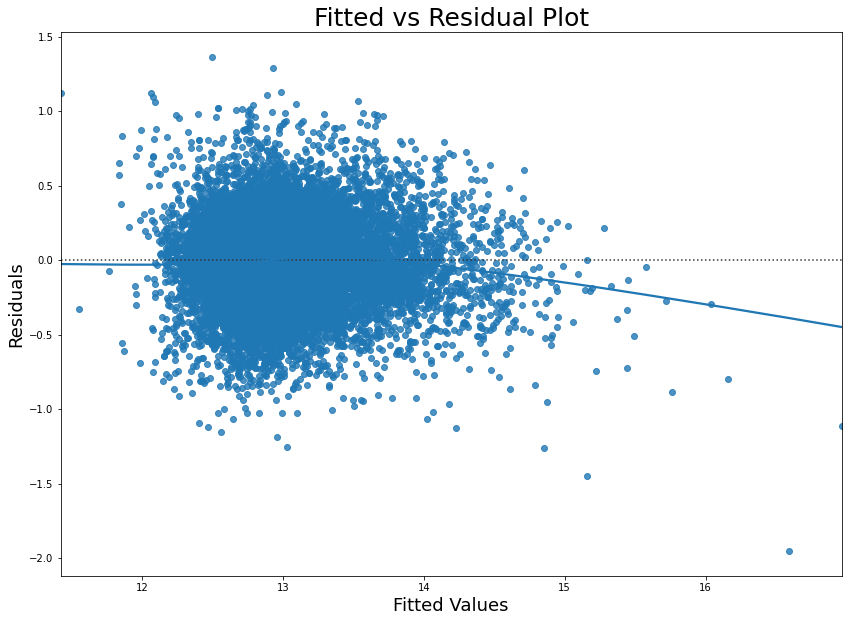

In [101]:
# Plot the fitted values vs residuals
plt.figure(figsize=(14, 10))
sns.residplot(data=df_pred, x="Fitted Values", y="Residuals", lowess=True)
plt.xlabel("Fitted Values", fontsize = 18)
plt.ylabel("Residuals", fontsize = 18)
plt.title("Fitted vs Residual Plot", fontsize = 25)
plt.show()

#### **Observations:**
- Residual values are distributed in a cloud and donot seem to folllow any pattern.

**This suggests that the assumption of linearity and independence in satisfied.**

### Testing for normality

Testing for normality of error terms (residuals) is essential in regression analysis. The assumption is that error terms should follow a normal distribution. When this assumption is violated, it can lead to issues such as overly wide or narrow confidence intervals for coefficient estimates. These deviations from normality can make it challenging to accurately estimate coefficients using the least squares method.

**To check for normality**
- Examine the shape of the histogram of residuals. A roughly bell-shaped histogram suggests normality, while deviations from this shape may indicate non-normality.

- Another valuable tool is the Q-Q (quantile-quantile) plot of residuals. If the residuals conform to a normal distribution, they will create a straight-line pattern on the plot. Deviations from a straight line suggest non-normality.

- Statistical tests like the Shapiro-Wilk test can be employed. The null hypothesis of this test is that residuals are normally distributed, while the alternative hypothesis is that they are not. If the test results in a significant p-value, it suggests evidence against the normality assumption.

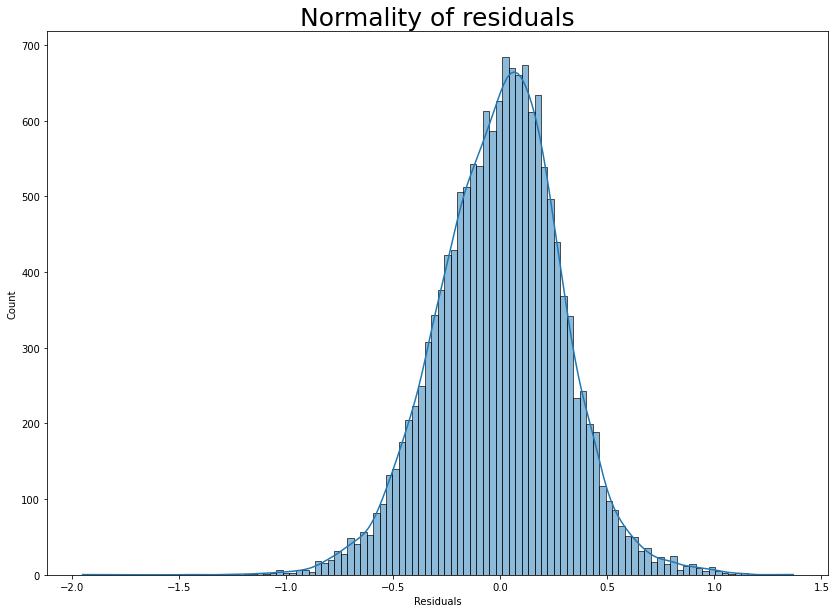

In [102]:
plt.figure(figsize=(14, 10))
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals", fontsize = 25)
plt.show()

#### **Observations:**
1. The residuals for a distorted bell-shaped curve similar to normal distribution.

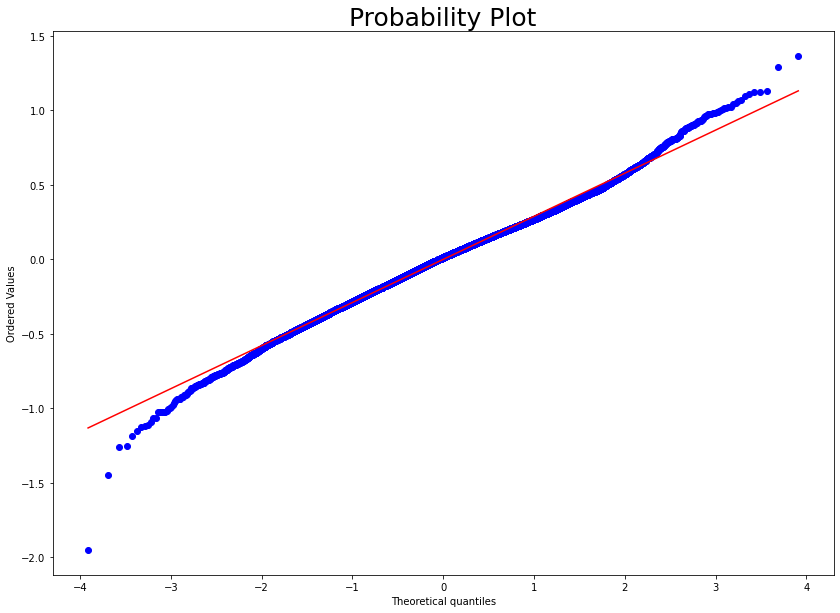

In [103]:
plt.figure(figsize=(14, 10))
stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.title("Probability Plot", fontsize = 25)
plt.show()

#### **Observations:**
1. The residuals more or less follow a straight line except for the tails.

#### Shapiro-Wilk test

In [104]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9957627654075623, pvalue=1.7088428622287496e-20)

#### **Observations:**
1. Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
2. However, as an approximation, we can accept this distribution as close to being normal.

**The assumption is satisfied**

### Testing for Homoscedasticity
Testing for homoscedasticity assesses whether the variance of residuals is consistent and symmetrically distributed around the regression line.

1. **Homoscedasticity** implies constant variance, where the spread of residuals is roughly the same across the regression line.

2. **Heteroscedasticity** means that the variance of residuals varies unequally across the regression line, often due to the presence of outliers.

3. To check for homoscedasticity, we examine the residual vs. fitted values plot. In the case of heteroscedasticity, the residuals may form irregular patterns, such as a funnel or arrow shape.

4. Additionally, the Goldfeld-Quandt test can be applied. If the p-value is greater than 0.05, we conclude that the residuals exhibit homoscedasticity (Null hypothesis). Conversely, a p-value below 0.05 suggests the presence of heteroscedasticity (Alternate hypothesis).


In [105]:
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], X_train4)
lzip(name, test)

[('F statistic', 0.9938841801888482), ('p-value', 0.6049987030054171)]

#### **Observations:**
1. Since p-value > 0.05, we can say that the residuals are homoscedastic. 

**This assumption is satisfied**

### All the assumptions of Linear Regression Model are satisfied.

### Comparing the initial model created with sklearn and the final statsmodels model

In [106]:
# Training performance comparison
models_train_comp_df = pd.concat(
    [linear_reg_train_performance.T, olsmodel2_train_perf.T],
    axis=1,
)

models_train_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression statsmodels",
]

print("Training performance comparison:")
display(models_train_comp_df)

# Test performance comparison
models_test_comp_df = pd.concat(
    [linear_reg_test_performance.T, olsmodel2_test_perf.T],
    axis=1,
)

models_test_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression statsmodels",
]

print("Test performance comparison:")
display(models_test_comp_df)

Training performance comparison:


Linear Regression sklearn  Linear Regression statsmodels
RMSE                             0.283641                       0.289852
MAE                              0.222430                       0.227065
R-squared                        0.711224                       0.698439
Adj. R-squared                   0.710554                       0.697920
MAPE                             1.709922                       1.745794

Test performance comparison:


Linear Regression sklearn  Linear Regression statsmodels
RMSE                             0.278319                       0.284057
MAE                              0.218105                       0.222293
R-squared                        0.718320                       0.706585
Adj. R-squared                   0.716791                       0.705404
MAPE                             1.676499                       1.708898

#### **Observations:**
1. Both the models perform similarly in both training and test case

---

## Final Model

#### Recreating the final statsmodels model and printing it's summary to gain insights.

In [107]:
olsmodel_final = sm.OLS(y_train, X_train4).fit()
print(olsmodel_final.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     1399.
Date:                Fri, 27 Oct 2023   Prob (F-statistic):               0.00
Time:                        23:25:19   Log-Likelihood:                -2731.6
No. Observations:               15129   AIC:                             5515.
Df Residuals:                   15103   BIC:                             5713.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  13.0303    

In [108]:
# Checking model performance on training set
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(olsmodel_final, X_train4, y_train)
olsmodel_final_train_perf

Training Performance



RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.289852  0.227065   0.698439         0.69792  1.745794

In [109]:
# Checking model performance on test set
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(olsmodel_final, X_test4, y_test)
olsmodel_final_test_perf

Test Performance



RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.284057  0.222293   0.706585        0.705404  1.708898

---

## Actionable Insights and Recommendations 

- **Linear Regression Model**
    - Attributes like room_bath, ceil, sight, condition, quality, ceil_measure, basement, total_area, age_of_property, coast_1.0, renovation_1, location_Location11, location_Location12, location_Location13, location_Location14 and location_Location4 have positive coefficients, indicating that an increase in them corresponds to higher predicted log_price.
    - Attributes like room_bed, location_Location10, location_Location17, location_Location18, location_Location19, location_Location3, location_Location5, location_Location6 have negative coefficients, indicating that an increase in them corresponds to lower predicted log_price.
    - The model suggests that a one-unit increase in coast_1.0 on standard scale leads to an approximately **0.3848**-unit increase in log_price. This correlation was evident in our EDA as well.
    - One unit increase in quality on standard scale leads to an approximately **0.2361**-unit increase in log_price.
    - coast_1.0, quality, ceil_measure, location_Location11, location_Location12 and location_Location13 are significant predictors, which contributes positively to log_price.
    - location_Location10, location_Location19, location_Location17, location_Location5 and location_Location3 are significant predictors, which contributes negatively to log_price.
    - Attributes like living_measure, renovation_age, log_lot_measure15 and furnished_1.0 are not significant factors for prediction.
    - The linear predictive model performs well, explaining around **70.5%** of the variance in the data with a mean absolute percentage error of approximately **1.71%**.
    - We ensured that **all assumptions for linear regression were met**, including checking for multicollinearity, normality of error terms, and homoscedasticity.

# Lasso Regression

In [110]:
# Create a Lasso regression model
lasso_model = Lasso(alpha=0.01)

# Fit the model on the training data
lasso_model.fit(X_train_scaled, y_train)
y_pred = lasso_model.predict(X_test_scaled)

In [111]:
# Lasso model
lasso_model_train_performance = model_performance_regression(lasso_model, X_train_scaled, y_train)
print("Training Performance")
print(lasso_model_train_performance)

Training Performance
      RMSE      MAE  R-squared  Adj. R-squared      MAPE
0  0.30543  0.24315   0.665153        0.664376  1.870441


In [112]:
# Lasso model
lasso_model_test_performance = model_performance_regression(lasso_model, X_test_scaled, y_test)
print("Testing Performance")
print(lasso_model_test_performance)

Testing Performance
       RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.297761  0.237192   0.677591        0.675841  1.824913


In [113]:
feature_importance = pd.Series(lasso_model.coef_, index=X.columns)
sorted_features = feature_importance.abs().sort_values(ascending=False)
print(sorted_features)

quality                0.227749
living_measure         0.124842
location_Location12    0.120696
age_of_property        0.118351
living_measure15       0.077195
location_Location11    0.042598
sight                  0.040916
location_Location3     0.035074
room_bath              0.034456
log_lot_measure15      0.030720
ceil                   0.023921
condition              0.022835
basement               0.012840
total_area             0.006053
location_Location19    0.000000
location_Location2     0.000000
location_Location20    0.000000
room_bed               0.000000
location_Location6     0.000000
location_Location4     0.000000
location_Location5     0.000000
location_Location17    0.000000
location_Location7     0.000000
location_Location18    0.000000
location_Location10    0.000000
location_Location16    0.000000
location_Location15    0.000000
location_Location14    0.000000
location_Location13    0.000000
renovation_1           0.000000
furnished_1.0          0.000000
coast_1.

# Ridge Regression

In [114]:
# Create a ridge regression model
ridge_model = Ridge(alpha=1)

# Fit the model on the training data
ridge_model.fit(X_train_scaled, y_train)
y_pred = ridge_model.predict(X_test_scaled)

In [115]:
# ridge model
ridge_model_train_performance = model_performance_regression(ridge_model, X_train_scaled, y_train)
print("Training Performance")
print(ridge_model_train_performance)

Training Performance
       RMSE       MAE  R-squared  Adj. R-squared     MAPE
0  0.283642  0.222438   0.711222        0.710553  1.70997


In [116]:
# ridge model
ridge_model_test_performance = model_performance_regression(ridge_model, X_test_scaled, y_test)
print("Testing Performance")
print(ridge_model_test_performance)

Testing Performance
       RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.278302  0.218093   0.718353        0.716824  1.676395


In [117]:
feature_importance = pd.Series(ridge_model.coef_, index=X.columns)
sorted_features = feature_importance.abs().sort_values(ascending=False)
print(sorted_features)

coast_1.0              0.420644
location_Location10    0.370854
location_Location19    0.303105
location_Location12    0.260508
location_Location5     0.246900
location_Location17    0.220662
location_Location11    0.214795
quality                0.204847
location_Location13    0.158146
location_Location3     0.157092
ceil_measure           0.134032
renovation_1           0.123426
living_measure15       0.104481
location_Location14    0.090677
location_Location18    0.085200
basement               0.072559
age_of_property        0.056615
location_Location6     0.047466
condition              0.040577
room_bath              0.038041
location_Location7     0.032124
sight                  0.027513
renovation_age         0.025354
total_area             0.024836
location_Location2     0.022847
location_Location15    0.022749
log_lot_measure15      0.022005
location_Location8     0.021969
location_Location16    0.014535
living_measure         0.011710
location_Location4     0.011567
ceil    

# Decision Tree Regression

In [118]:
d_tree=DecisionTreeRegressor(random_state = 42)
d_tree.fit(X_train_scaled,y_train)

DecisionTreeRegressor(random_state=42)

In [119]:
from sklearn import tree
"""plt.figure(figsize=(40, 40))
out = tree.plot_tree(
    data_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()"""

'plt.figure(figsize=(40, 40))\nout = tree.plot_tree(\n    data_model,\n    feature_names=feature_names,\n    filled=True,\n    fontsize=9,\n    node_ids=False,\n    class_names=None,\n)\n# below code will add arrows to the decision tree split if they are missing\nfor o in out:\n    arrow = o.arrow_patch\n    if arrow is not None:\n        arrow.set_edgecolor("black")\n        arrow.set_linewidth(1)\nplt.show()'

In [120]:
feature_importance = pd.Series(d_tree.feature_importances_, index=X.columns)
sorted_features = feature_importance.sort_values(ascending=False)
print(sorted_features)

quality                0.456083
living_measure         0.120280
age_of_property        0.092665
living_measure15       0.063478
log_lot_measure15      0.057768
total_area             0.031462
ceil_measure           0.026178
renovation_age         0.022228
location_Location12    0.012065
room_bath              0.011013
basement               0.010281
room_bed               0.009537
condition              0.008330
location_Location3     0.007525
sight                  0.007223
location_Location10    0.007205
location_Location4     0.006691
location_Location5     0.005913
location_Location8     0.004782
location_Location13    0.004723
location_Location11    0.004592
coast_1.0              0.004559
location_Location6     0.003738
ceil                   0.003691
location_Location20    0.002895
location_Location17    0.002790
location_Location14    0.002766
location_Location18    0.001727
location_Location2     0.001714
location_Location7     0.001509
location_Location15    0.001481
location

In [121]:
feature_names = list(X_train_scaled.columns)

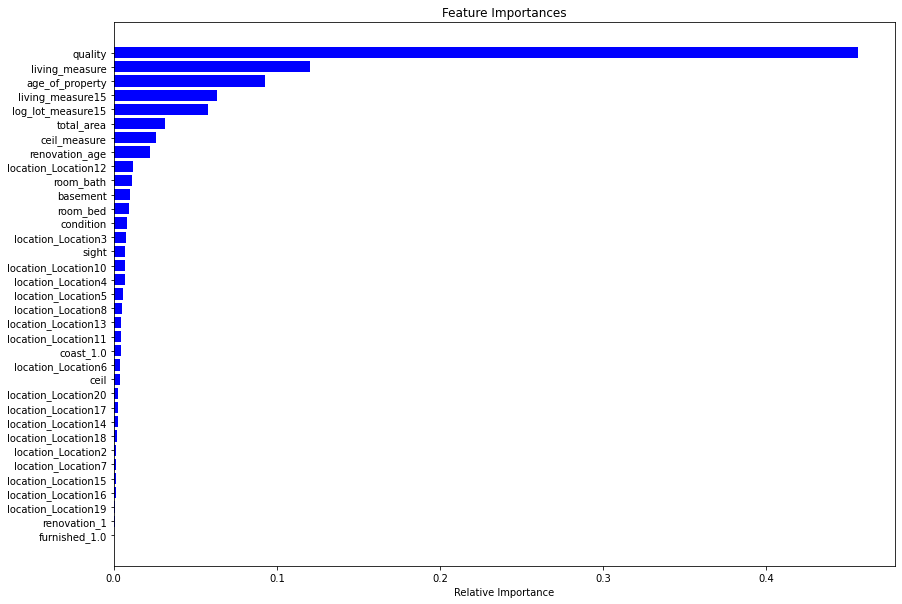

In [122]:
#Alternate way to identify the  Features Important with the help of visualization

importances = d_tree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(14, 10))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="blue", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [123]:
# Decision Tree model
d_tree_train_performance = model_performance_regression(d_tree, X_train_scaled, y_train)
print("Training Performance")
print(d_tree_train_performance)

Training Performance
       RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.027464  0.002531   0.997293        0.997286  0.020019


In [124]:
# Decision Tree model
d_tree_test_performance = model_performance_regression(d_tree, X_test_scaled, y_test)
print("Testing Performance")
print(d_tree_test_performance)

Testing Performance
      RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.35954  0.264481   0.529925        0.527373  2.032842


## Pruned Decision Tree

In [125]:
d_tree_pruned=DecisionTreeRegressor(random_state = 42, max_depth = 6)
d_tree_pruned.fit(X_train_scaled,y_train)

DecisionTreeRegressor(max_depth=6, random_state=42)

In [126]:
from sklearn import tree
"""plt.figure(figsize=(40, 40))
out = tree.plot_tree(
    d_tree_pruned,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()"""

'plt.figure(figsize=(40, 40))\nout = tree.plot_tree(\n    d_tree_pruned,\n    feature_names=feature_names,\n    filled=True,\n    fontsize=9,\n    node_ids=False,\n    class_names=None,\n)\n# below code will add arrows to the decision tree split if they are missing\nfor o in out:\n    arrow = o.arrow_patch\n    if arrow is not None:\n        arrow.set_edgecolor("black")\n        arrow.set_linewidth(1)\nplt.show()'

In [127]:
feature_importance = pd.Series(d_tree_pruned.feature_importances_, index=X.columns)
sorted_features = feature_importance.sort_values(ascending=False)
print(sorted_features)

quality                0.685046
living_measure         0.127741
age_of_property        0.106026
living_measure15       0.032764
log_lot_measure15      0.022097
location_Location10    0.006554
location_Location12    0.006303
coast_1.0              0.003904
sight                  0.003006
ceil_measure           0.002211
location_Location5     0.001341
basement               0.001138
location_Location3     0.000848
condition              0.000801
location_Location16    0.000157
ceil                   0.000060
location_Location17    0.000000
location_Location4     0.000000
location_Location7     0.000000
location_Location20    0.000000
location_Location2     0.000000
location_Location19    0.000000
location_Location18    0.000000
location_Location6     0.000000
room_bed               0.000000
location_Location15    0.000000
location_Location14    0.000000
location_Location13    0.000000
location_Location11    0.000000
room_bath              0.000000
renovation_1           0.000000
furnishe

In [128]:
feature_names = list(X_train_scaled.columns)

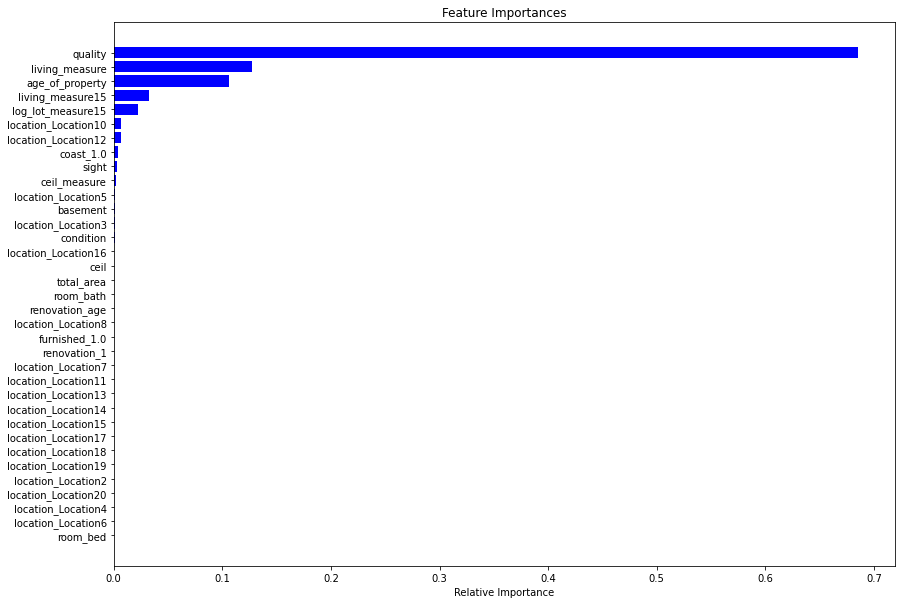

In [129]:
#Alternate way to identify the  Features Important with the help of visualization

importances = d_tree_pruned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(14, 10))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="blue", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [130]:
# Decision Tree model
d_tree_pruned_train_performance = model_performance_regression(d_tree_pruned, X_train_scaled, y_train)
print("Training Performance")
print(d_tree_pruned_train_performance)

Training Performance
       RMSE       MAE  R-squared  Adj. R-squared     MAPE
0  0.306909  0.242295   0.661902        0.661118  1.86479


In [131]:
# Decision Tree model
d_tree_pruned_test_performance = model_performance_regression(d_tree_pruned, X_test_scaled, y_test)
print("Testing Performance")
print(d_tree_pruned_test_performance)

Testing Performance
       RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.311415  0.243558   0.647344         0.64543  1.872549


# SVM Regression

In [132]:
# SVR model 
svr = SVR(kernel='linear')

In [133]:
# Train the SVR model on the training data
svr.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svr.predict(X_test_scaled)


In [134]:
# SVR model
svr_train_performance = model_performance_regression(svr, X_train_scaled, y_train)
print("Training Performance")
print(svr_train_performance)

Training Performance
       RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.284137  0.221874   0.710212         0.70954  1.706869


In [135]:
# SVR model
svr_test_performance = model_performance_regression(svr, X_test_scaled, y_test)
print("Testing Performance")
print(svr_test_performance)


Testing Performance
       RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.279239  0.217933   0.716454        0.714915  1.676233


# KNN Regression

In [136]:
knn = KNeighborsRegressor(n_neighbors=5)

In [137]:
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

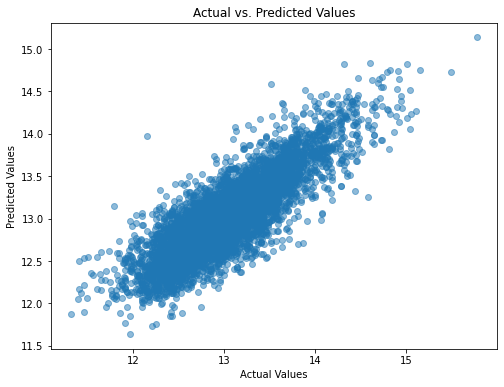

In [138]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

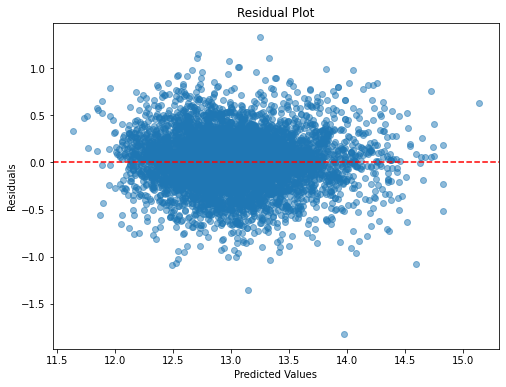

In [139]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

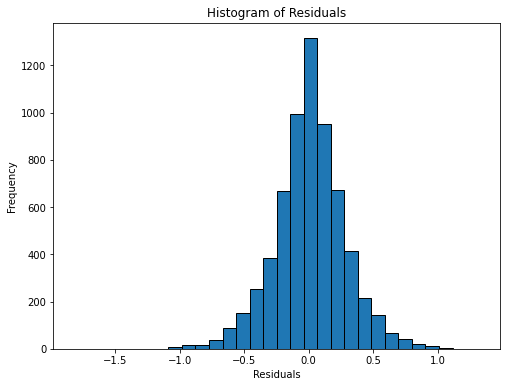

In [140]:
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, edgecolor='k')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

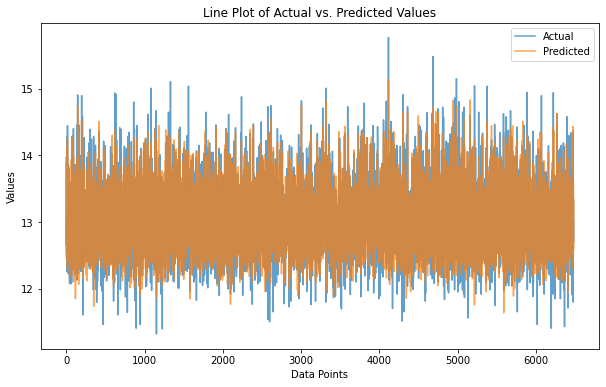

In [141]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label="Actual", alpha=0.7)
plt.plot(y_pred, label="Predicted", alpha=0.7)
plt.xlabel("Data Points")
plt.ylabel("Values")
plt.title("Line Plot of Actual vs. Predicted Values")
plt.legend()
plt.show()

In [142]:
# Checking model performance on training set
knn_train_performance = model_performance_regression(knn, X_train_scaled, y_train)
print("Training Performance")
knn_train_performance

Training Performance


RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.231109  0.170316   0.808284        0.807839  1.307773

In [143]:
# Checking model performance on testing set
knn_test_performance = model_performance_regression(knn, X_test_scaled, y_test)
print("Testing Performance")
knn_test_performance

Testing Performance


RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.276224  0.205825   0.722543        0.721037  1.580193

### KNN Tuned

In [144]:
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
best_k = grid_search.best_params_['n_neighbors']
print(f"Best k: {best_k}")

Best k: 9


In [145]:
knn_tuned = grid_search.best_estimator_

In [146]:
knn_tuned.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

In [147]:
# Checking model performance on training set
knn_tuned_train_performance = model_performance_regression(knn_tuned, X_train_scaled, y_train)
print("Training Performance")
knn_tuned_train_performance

Training Performance


RMSE      MAE  R-squared  Adj. R-squared      MAPE
0  0.247794  0.18487   0.779604        0.779092  1.419487

In [148]:
# Checking model performance on testing set
knn_tuned_test_performance = model_performance_regression(knn_tuned, X_test_scaled, y_test)
print("Testing Performance")
knn_tuned_test_performance

Testing Performance


RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.270704  0.202986   0.733522        0.732076  1.558034